In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
import scipy.stats as sci
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
import re
import pylab

In [16]:
gene_df=pd.read_csv("brainlipo.csv",index_col=3)
gene_df=gene_df.drop(['row_num', 'gene_id', 'ensembl_gene_id', 'entrez_id'], axis=1).T


In [17]:
gene_df=gene_df.T
nasamples = gene_df.values
print(nasamples)

[[3.4373239e+01 2.0765661e+01 1.8734947e+01 ... 2.8731717e+01
  1.6679597e+01 2.8866042e+01]
 [4.9578860e+00 4.8852960e+00 4.5086660e+00 ... 3.9733370e+00
  4.6364620e+00 5.5222420e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.1950902e+01
  3.4038134e+01 1.2859782e+01]
 ...
 [4.9811440e+00 4.6480990e+00 4.1937550e+00 ... 1.1340620e+00
  1.6032100e+00 1.1342940e+00]
 [9.8518800e-01 1.4714670e+00 6.5902600e-01 ... 1.8950470e+00
  2.7315240e+00 1.4831880e+00]
 [6.1302300e-01 4.0508600e-01 2.2463400e-01 ... 1.5103000e-02
  3.4608600e-01 1.4298900e-01]]


In [18]:
model = NMF( n_components=3,init='random', random_state=0)
W = model.fit_transform(nasamples)
H = model.components_

In [19]:
for x in range(524):
    print(gene_df.columns[x],H[[0,1,2],x].tolist())

1-8 pcw-M-Ocx [0.06324112555201393, 0.9787868573449102, 0.6376218648412768]
2-8 pcw-M-M1C-S1C [0.007751591269962017, 1.320988000839041, 0.418578543715847]
3-8 pcw-M-AMY [0.04564674717538943, 1.2766879136243425, 0.4238945830836421]
4-8 pcw-M-MGE [0.0, 1.2248757517017135, 0.5100613886753812]
5-8 pcw-M-STC [0.29900323728373807, 1.5565069841202155, 0.3796748184308172]
6-8 pcw-M-URL [0.30254182455521134, 1.4745754926218642, 0.1938541821283513]
7-8 pcw-M-CGE [0.0, 1.4420171591438455, 0.42049423975012357]
8-8 pcw-M-DTH [0.0, 1.0690647769024006, 0.5291021922232958]
9-8 pcw-M-MFC [0.0, 0.8299949728923417, 0.6987778840221359]
10-8 pcw-M-DFC [0.0027235201836323586, 0.7425967723835012, 0.7778197393197746]
11-8 pcw-M-OFC [0.27130123513778465, 0.6918866213615473, 0.9368527150991921]
12-8 pcw-M-LGE [0.0, 1.2944445965603921, 0.34909073643005323]
13-8 pcw-M-ITC [0.024723645131331684, 1.3374188786320433, 0.3064947486100972]
14-8 pcw-M-HIP [0.13265274911783545, 1.032608472630431, 0.7450906556436565]
15-8

In [20]:
H2=[]
for x in range(524):
    t=(gene_df.columns[x],H[0,x])
    
    
    H2.append(t)
    

H2.sort( key=lambda x:x[1], reverse=True)

print(H2)

[('227-37 pcw-M-MD', 18.293348692231973), ('301-2 yrs-F-MD', 18.204574943123145), ('307-2 yrs-F-V1C', 14.771370007558069), ('306-2 yrs-F-OFC', 14.204195107060912), ('300-2 yrs-F-ITC', 14.13911689042308), ('302-2 yrs-F-DFC', 14.133728777482457), ('279-10 mos-M-MD', 13.66405018801125), ('297-2 yrs-F-VFC', 13.140106968943904), ('308-2 yrs-F-STC', 11.46236558777303), ('229-37 pcw-M-STR', 11.254068458059256), ('322-3 yrs-M-M1C', 11.238994628109968), ('325-3 yrs-M-IPC', 10.7511787550641), ('317-3 yrs-F-A1C', 10.75096759107806), ('318-3 yrs-F-MD', 10.72435406868335), ('298-2 yrs-F-IPC', 10.512427811093875), ('299-2 yrs-F-S1C', 10.257749739862016), ('393-13 yrs-F-MD', 9.675706298453804), ('324-3 yrs-M-STC', 9.670865928092072), ('326-3 yrs-M-A1C', 9.57035499544408), ('323-3 yrs-M-S1C', 9.491792276322895), ('312-3 yrs-F-ITC', 9.395555668395522), ('330-3 yrs-M-VFC', 9.196290117422482), ('216-25 pcw-F-A1C', 9.073962825398352), ('333-3 yrs-M-ITC', 9.073954880208042), ('219-26 pcw-F-DFC', 8.96006860

In [21]:
H_df=pd.DataFrame(H, columns=gene_df.columns).T
x=[]
for value in H.T:
    if value[0] > value[1] and value[0]>value[2]:
        x.append(0)
    elif value[1] > value[0] and value[1]>value[2]:
        x.append(1)
    else:x.append(2)
H_df['C']=x

H_df['C_new']=H_df.iloc[:,0:3].idxmax(axis=1)

# H_df['0_1_diff'] =H_df[0]-H_df[1]
# H_df=H_df.sort_values(by='0_1_diff', ascending=False)
print(H_df)
C0s=H_df.loc[H_df['C']==0].index
C1s=H_df.loc[H_df['C']==1].index
C2s=H_df.loc[H_df['C']==2].index
print(x)

                          0         1         2  C  C_new
1-8 pcw-M-Ocx      0.063241  0.978787  0.637622  1      1
2-8 pcw-M-M1C-S1C  0.007752  1.320988  0.418579  1      1
3-8 pcw-M-AMY      0.045647  1.276688  0.423895  1      1
4-8 pcw-M-MGE      0.000000  1.224876  0.510061  1      1
5-8 pcw-M-STC      0.299003  1.556507  0.379675  1      1
...                     ...       ...       ... ..    ...
520-40 yrs-F-IPC   0.012261  2.384096  0.928830  1      1
521-40 yrs-F-M1C   0.615598  2.029823  1.481620  1      1
522-40 yrs-F-HIP   1.616150  1.330916  1.168223  0      0
523-40 yrs-F-STR   2.499979  1.730165  2.625036  2      2
524-40 yrs-F-S1C   0.374916  2.228877  1.460245  1      1

[524 rows x 5 columns]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [22]:
ageRegex=re.compile('.*-(\d+) (.+)-.+-')
C0ages =[]
for sample in C0s:
    matches=ageRegex.findall(sample)
    age=int(matches[0][0])
    units= matches[0][1]
    if units =='mos':
        age=age*4
    if units =='pcw':
        age=np.abs(age-38)*-1
    if units =='yrs':
        age=age*52
        
    C0ages.append(age)
    
C1ages=[]
for sample in C1s:
    matches=ageRegex.findall(sample)
    age=int(matches[0][0])
    units=matches[0][1]
    if units =='mos':
        age=age*4
    if units =='pcw':
        age=np.abs(age-38)*-1
    if units =='yrs':
        age=age*52
        
    C1ages.append(age)

C2ages=[]
for sample in C2s:
    matches=ageRegex.findall(sample)
    age=int(matches[0][0])
    units=matches[0][1]
    if units =='mos':
        age=age*4
    if units =='pcw':
        age=np.abs(age-38)*-1
    if units =='yrs':
        age=age*52
        
    C2ages.append(age)
    
print('Mean C0 age',np.mean(C0ages))
print('Mean C1 age',np.mean(C1ages))
print('Mean C2 age',np.mean(C2ages))


print('Median C0 age',np.median(C0ages))
print('Median C1 age',np.median(C1ages))
print('Median C2 age',np.median(C2ages))

Mean C0 age 265.5657894736842
Mean C1 age 384.04371584699453
Mean C2 age 680.1341463414634
Median C0 age 104.0
Median C1 age -17.0
Median C2 age 676.0


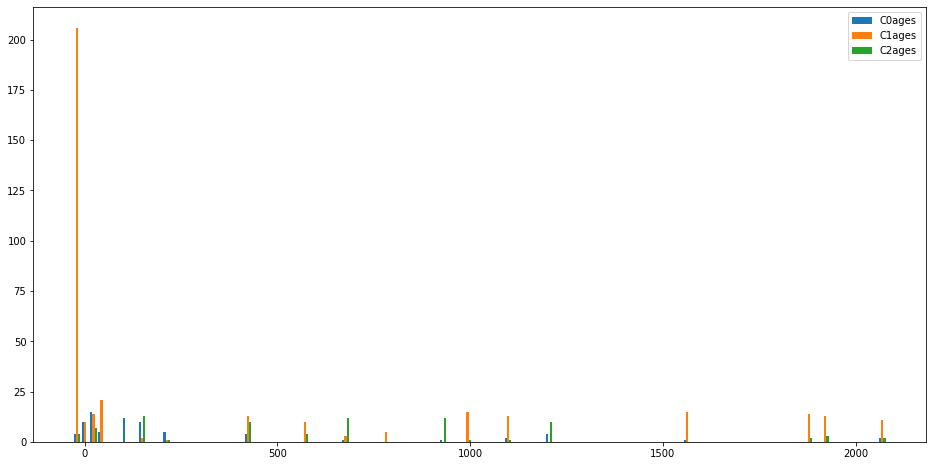

In [23]:
plt.figure(figsize=(16,8))
plt.hist([C0ages,C1ages,C2ages],100,label=['C0ages', 'C1ages','C2ages'])
plt.legend(loc= 'upper right')

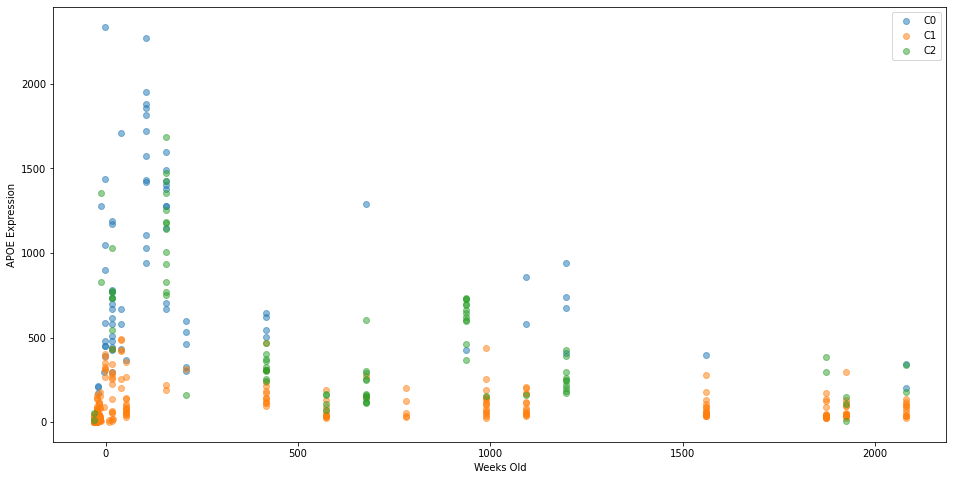

In [24]:
plt.figure(figsize=(16,8))
plt.scatter(C0ages, gene_df.loc['APOE'][C0s], label='C0',alpha=.5)
plt.scatter(C1ages, gene_df.loc['APOE'][C1s], label='C1',alpha=.5)
plt.scatter(C2ages, gene_df.loc['APOE'][C2s], label='C2',alpha=.5)
plt.ylabel('APOE Expression')
plt.xlabel('Weeks Old')
plt.legend(loc='upper right')

In [25]:
genes=[]
for x in gene_df.T:
    genes.append(x)

<ipython-input-26-12c0de62af00>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16,8))


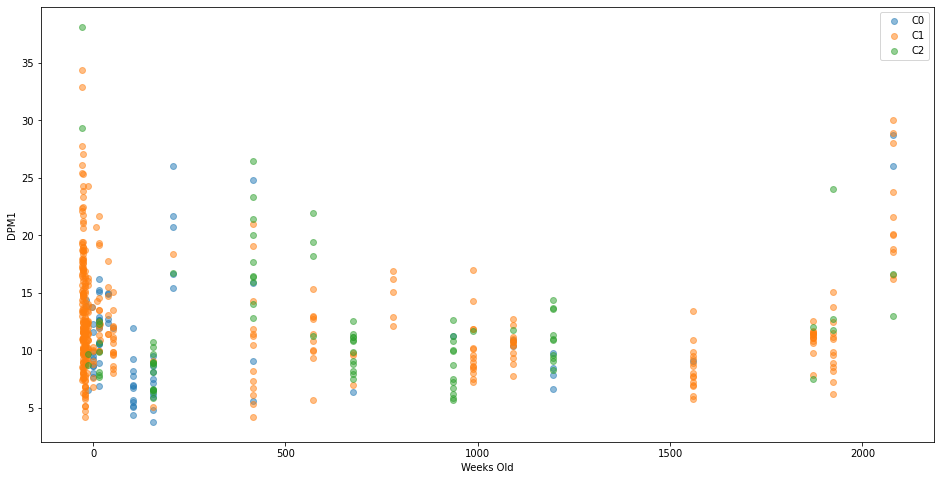

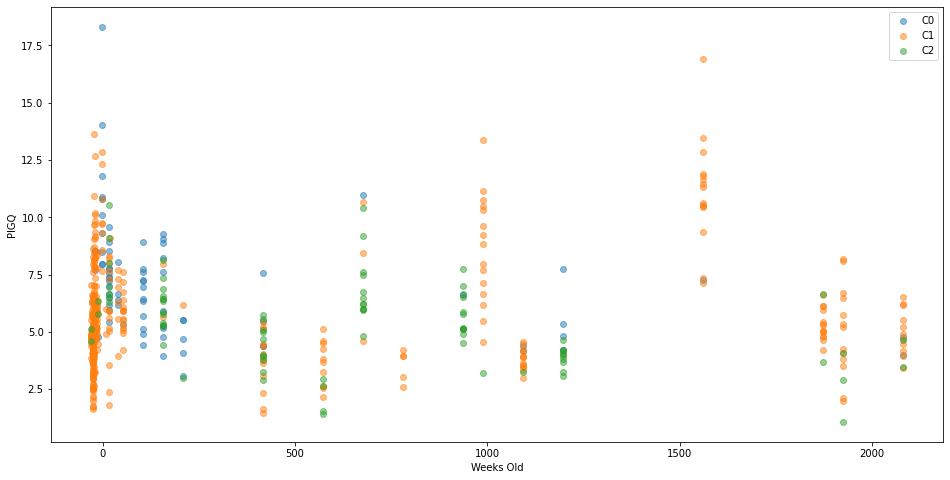

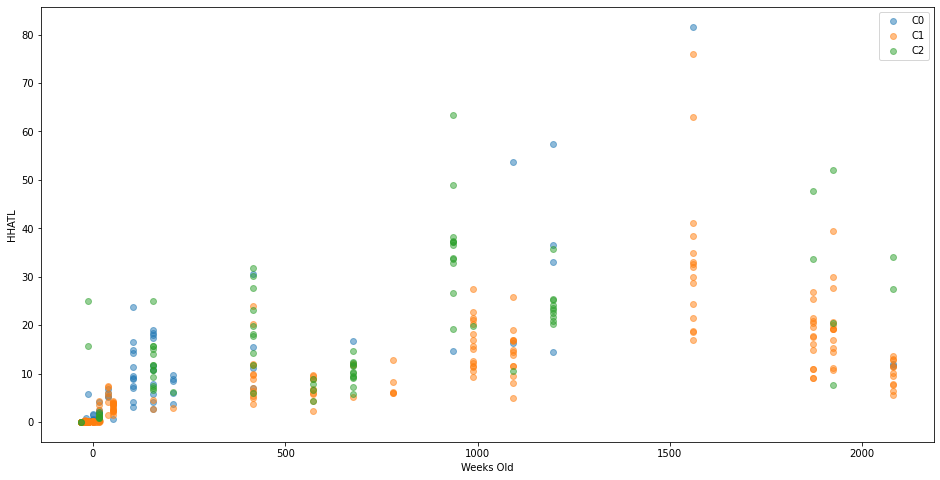

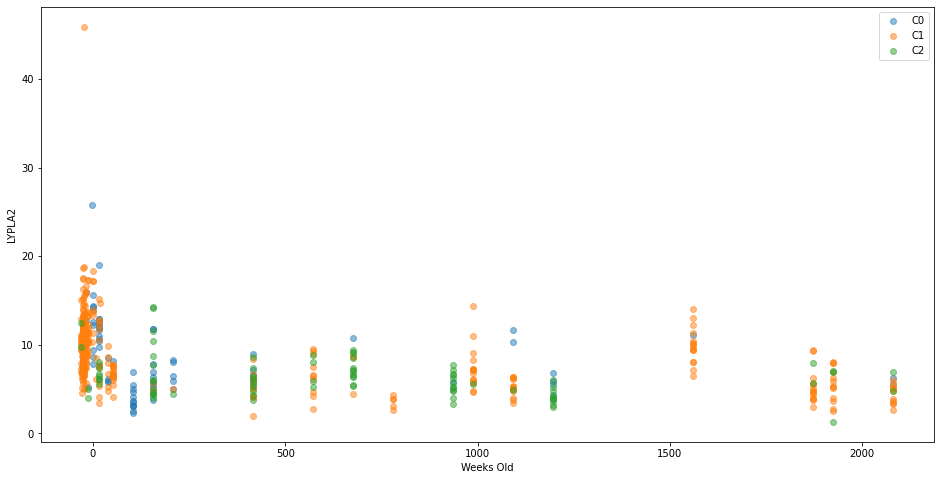

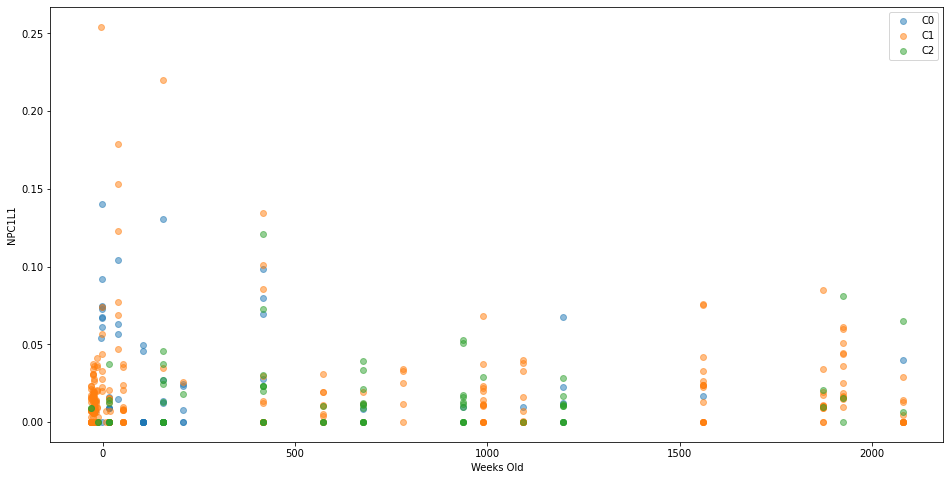

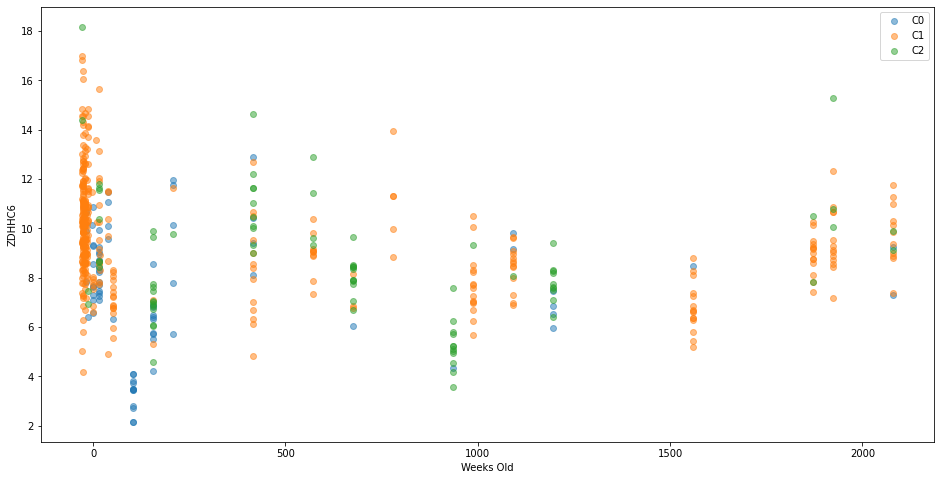

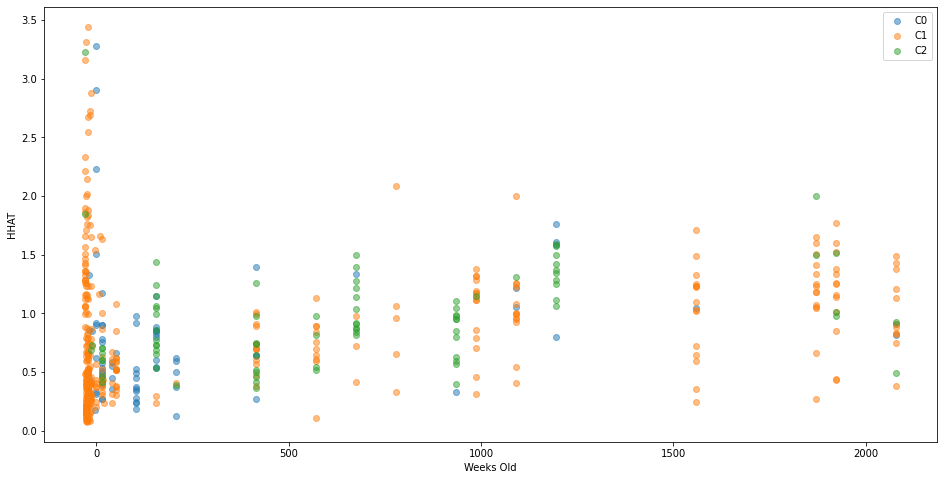

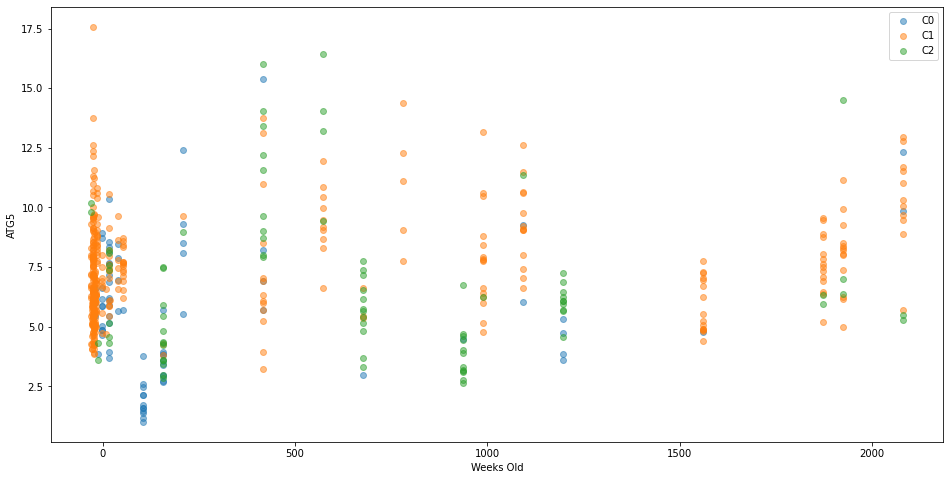

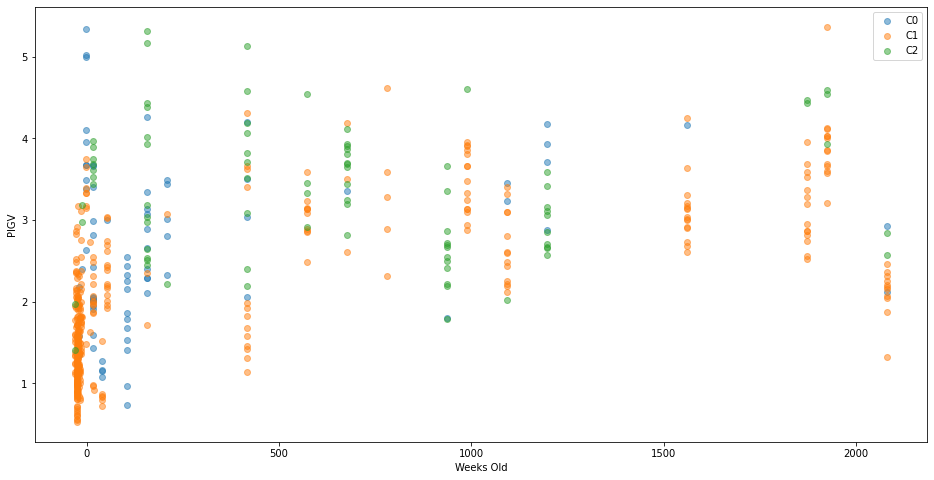

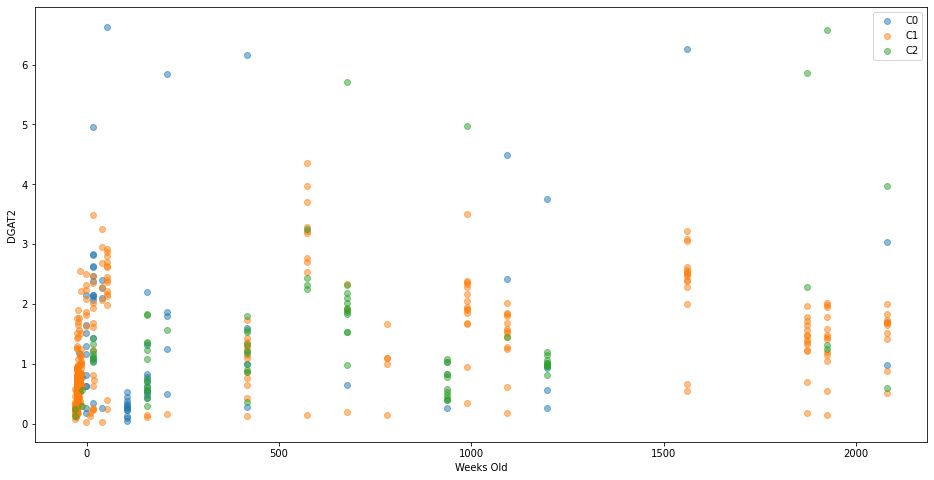

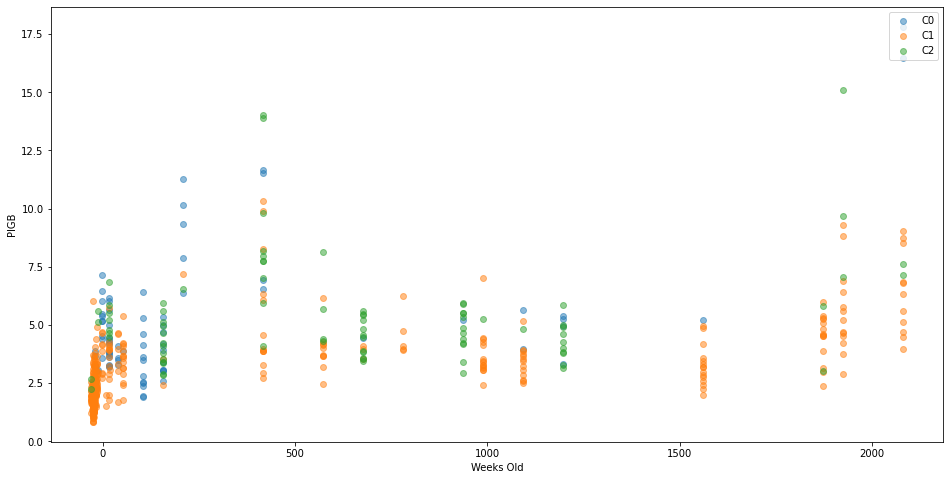

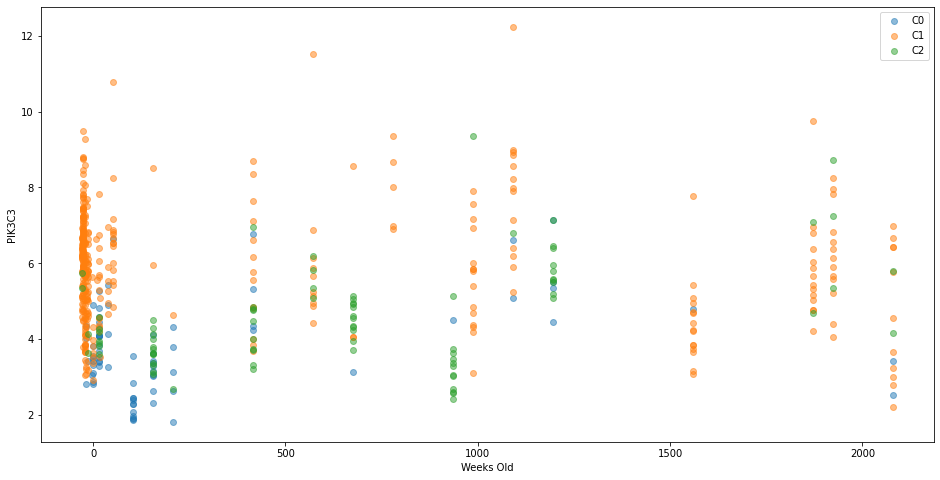

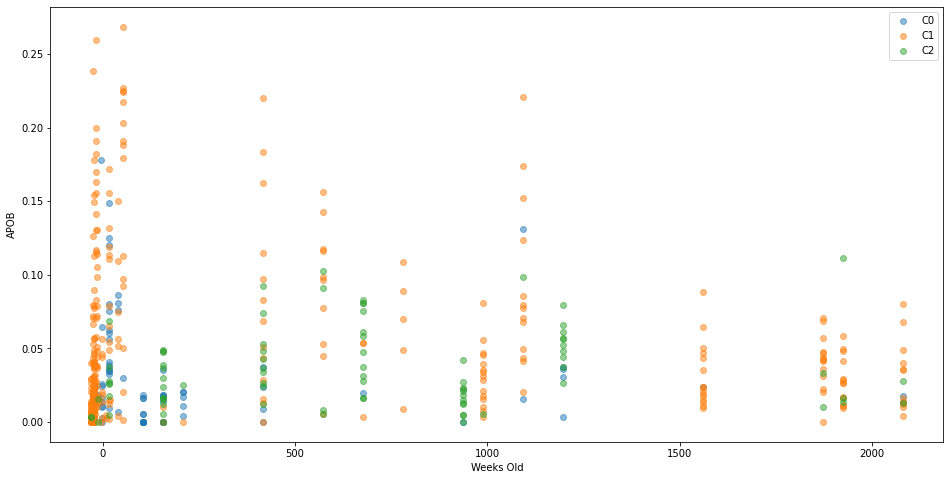

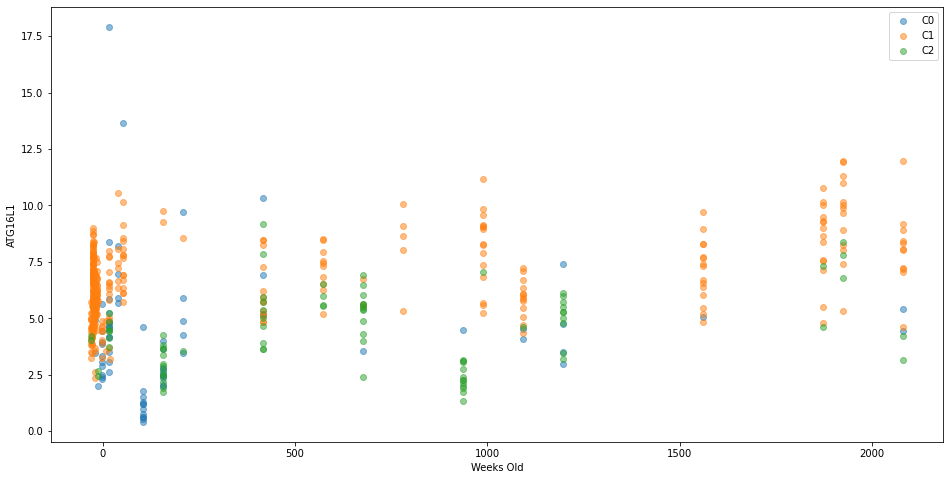

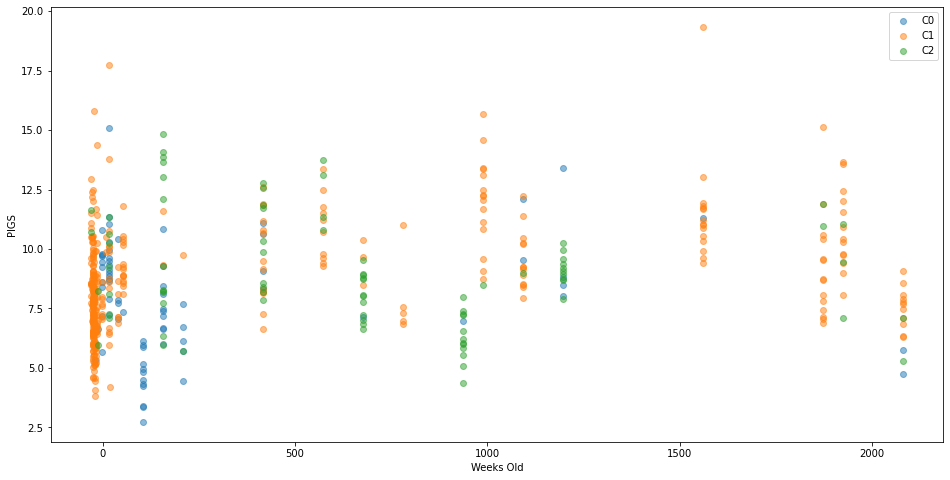

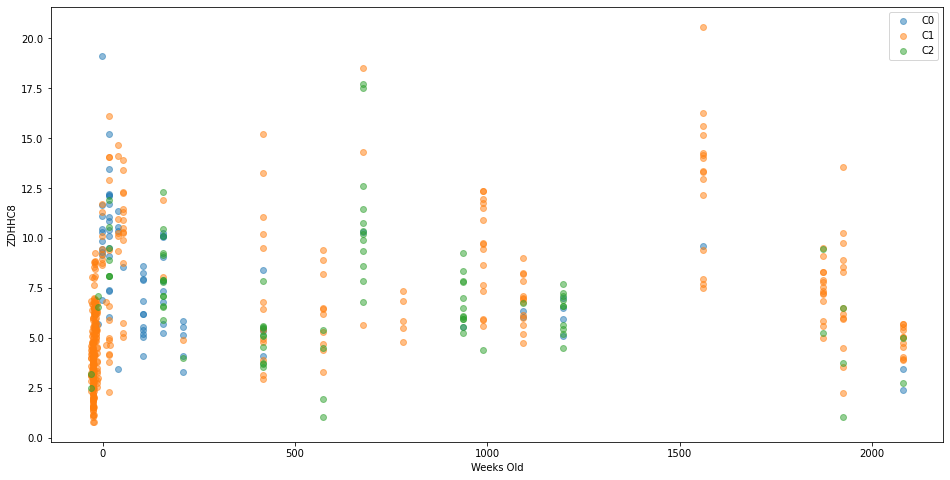

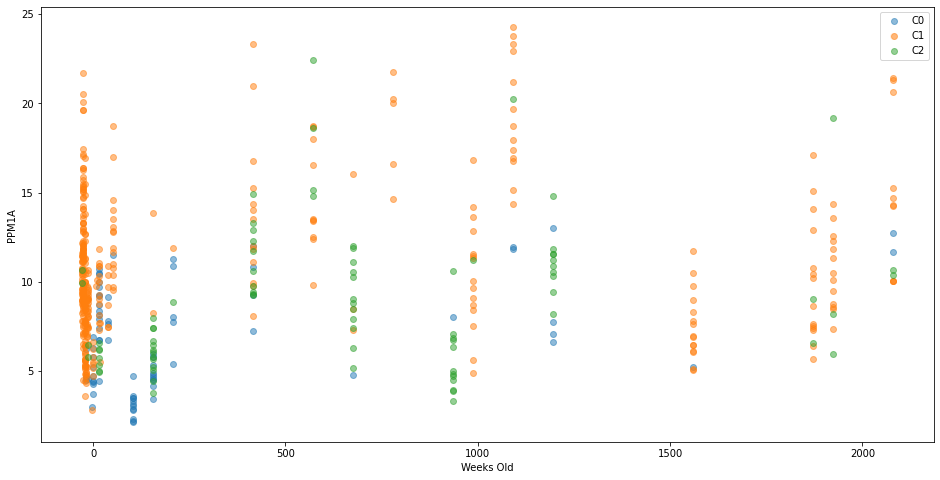

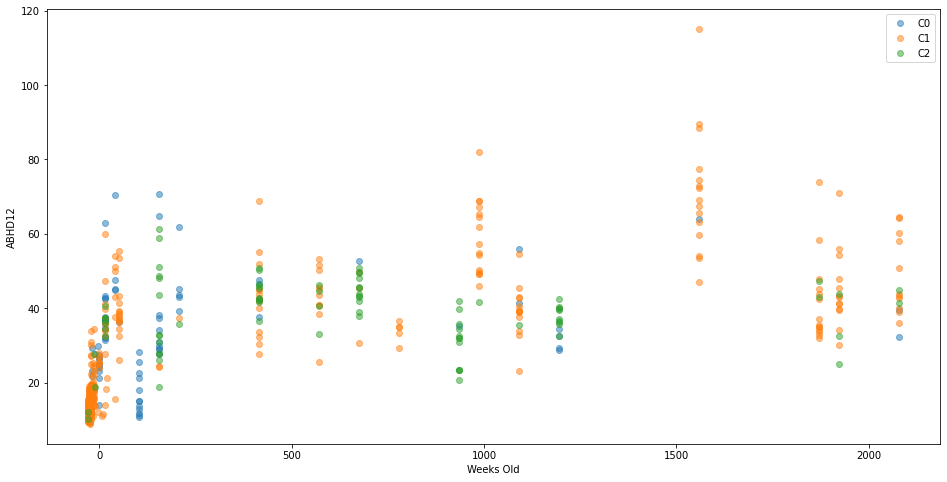

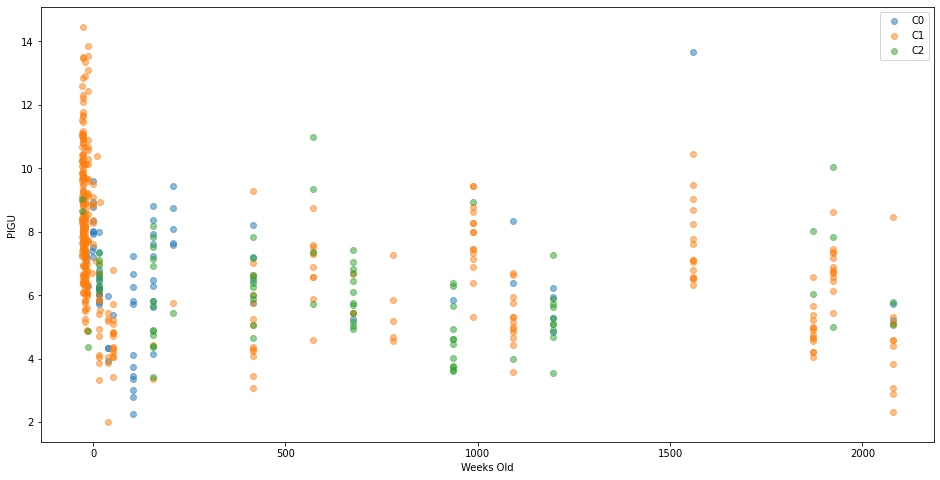

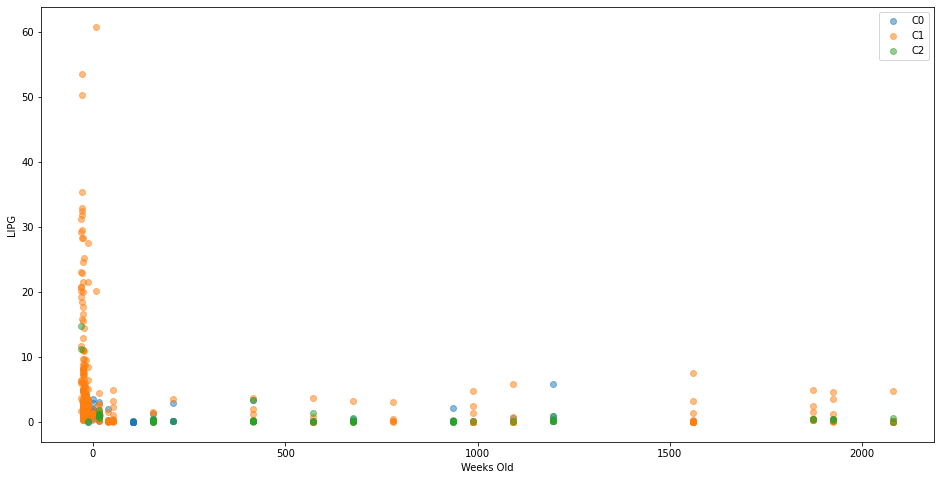

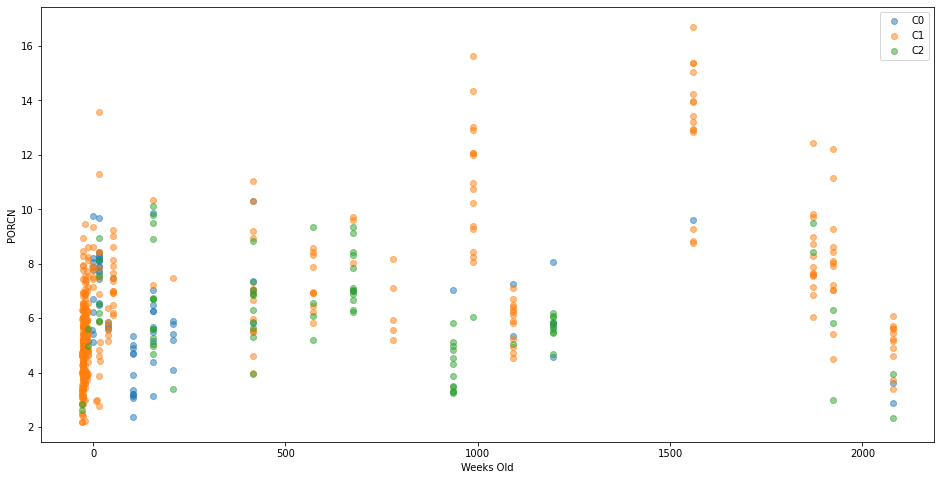

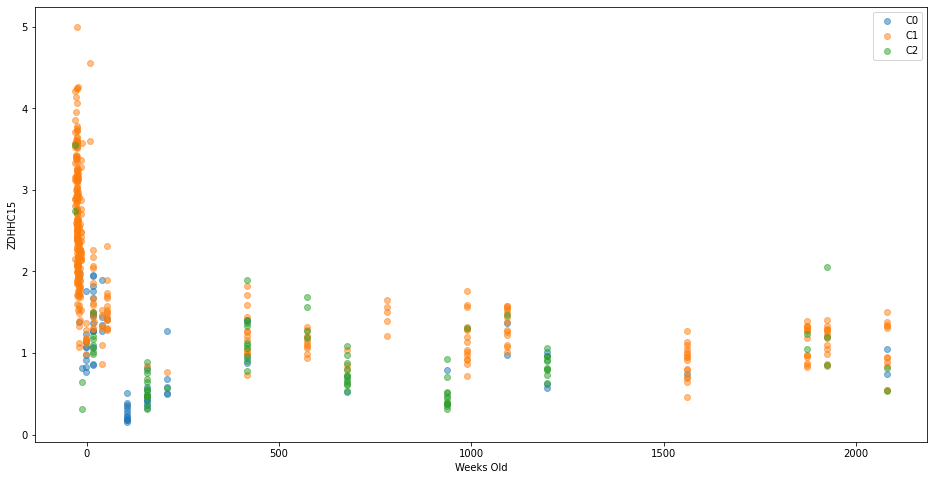

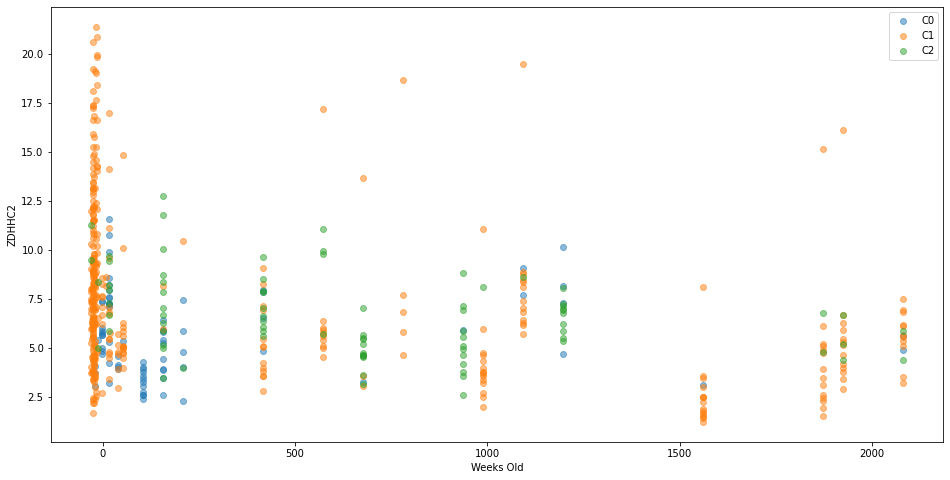

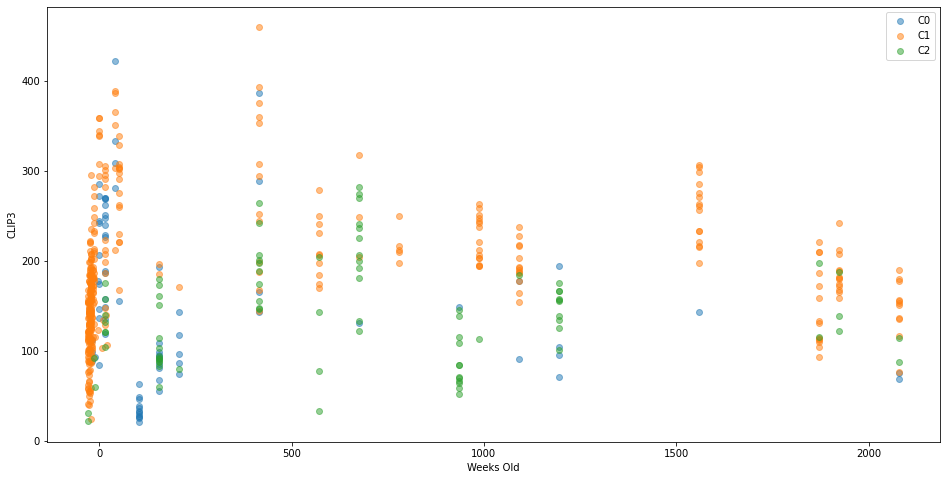

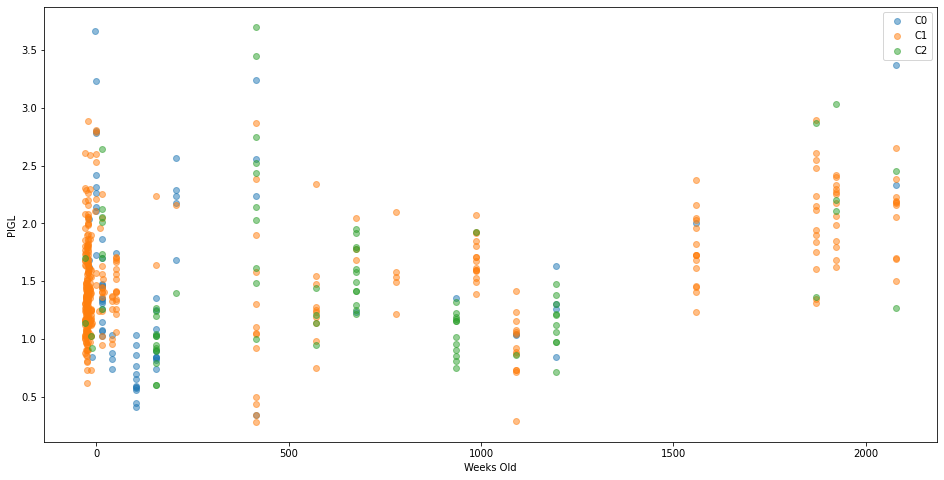

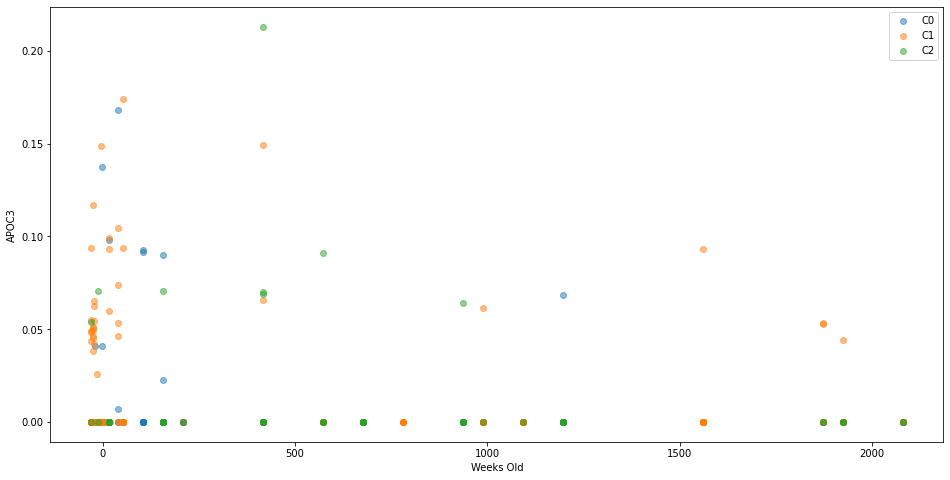

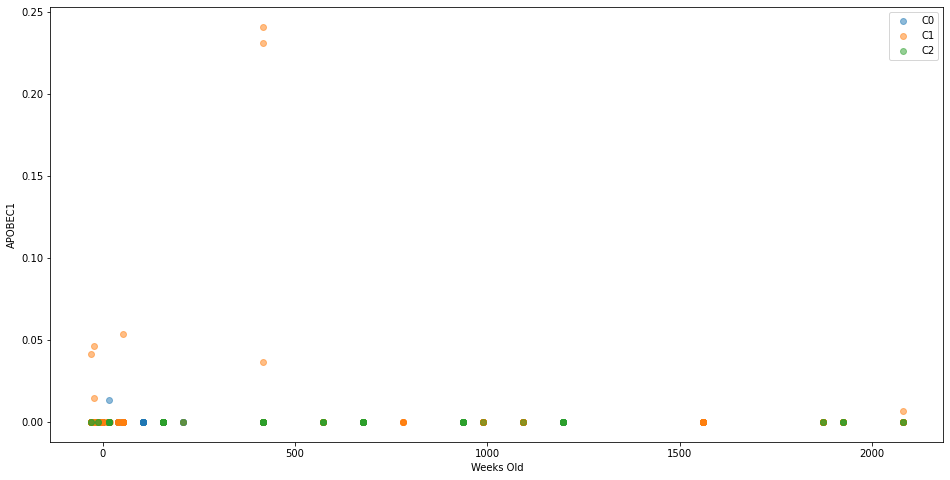

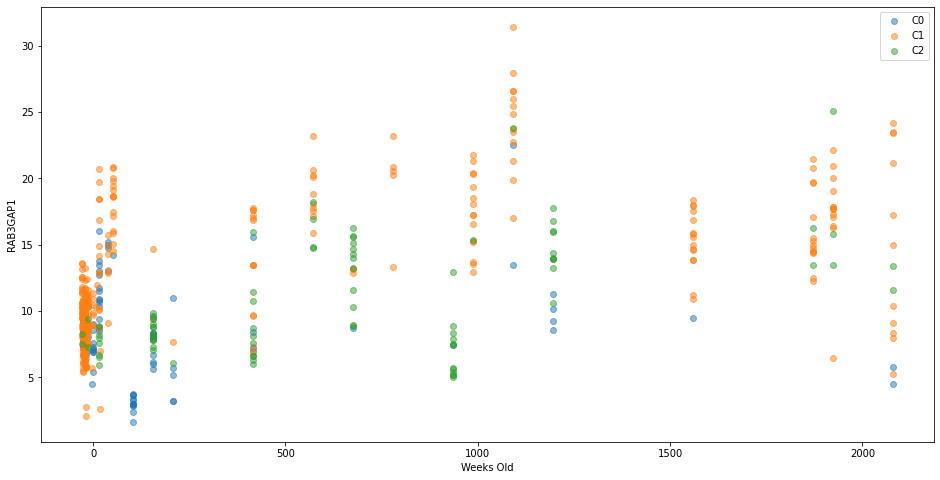

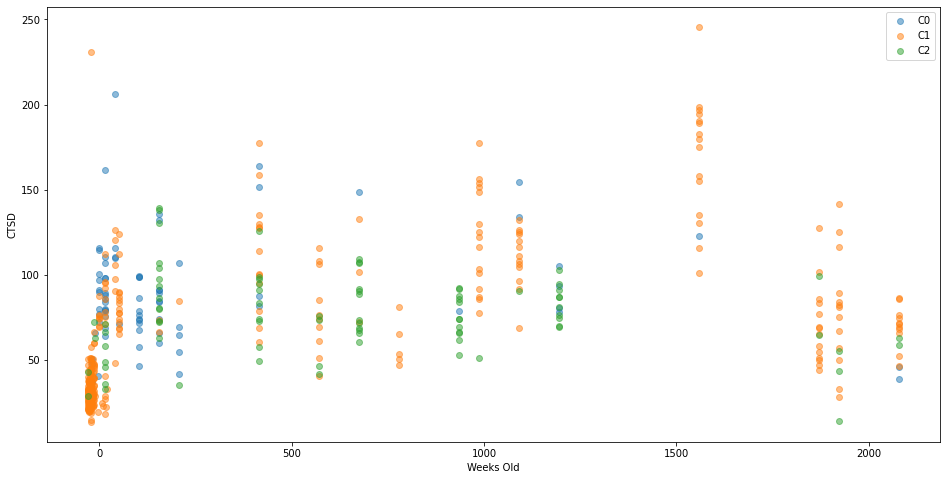

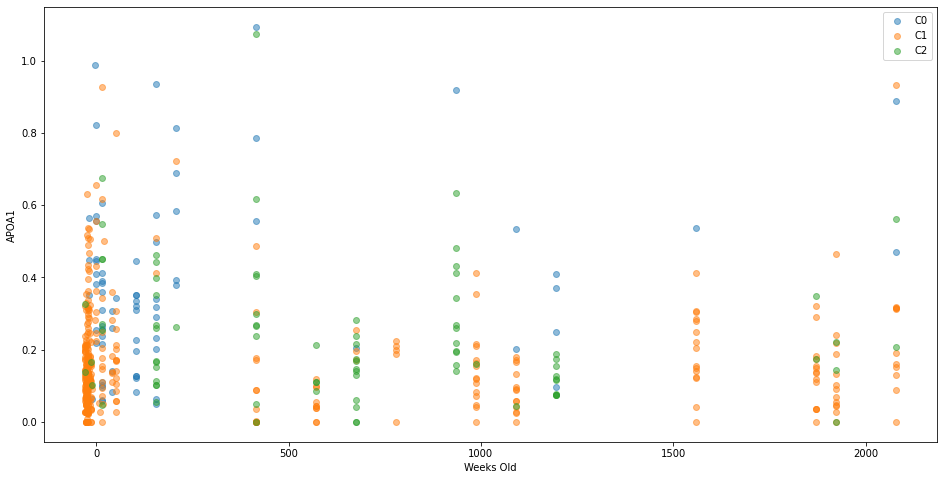

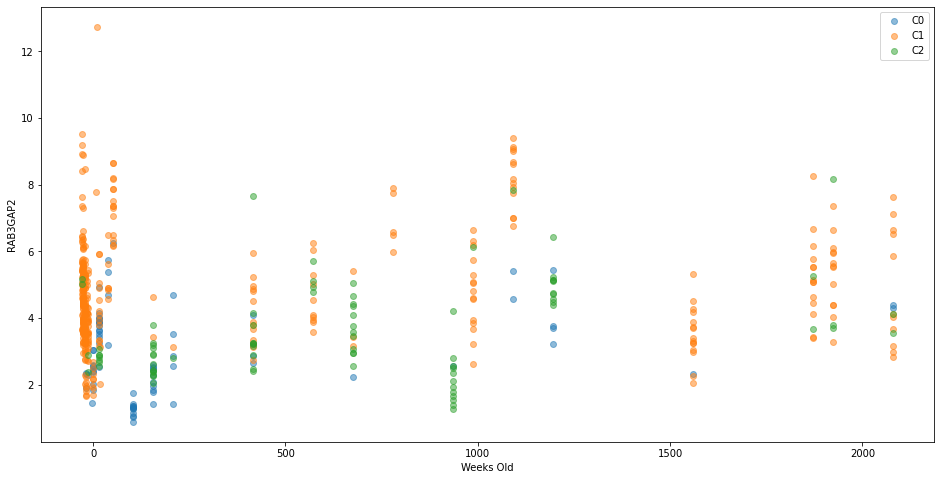

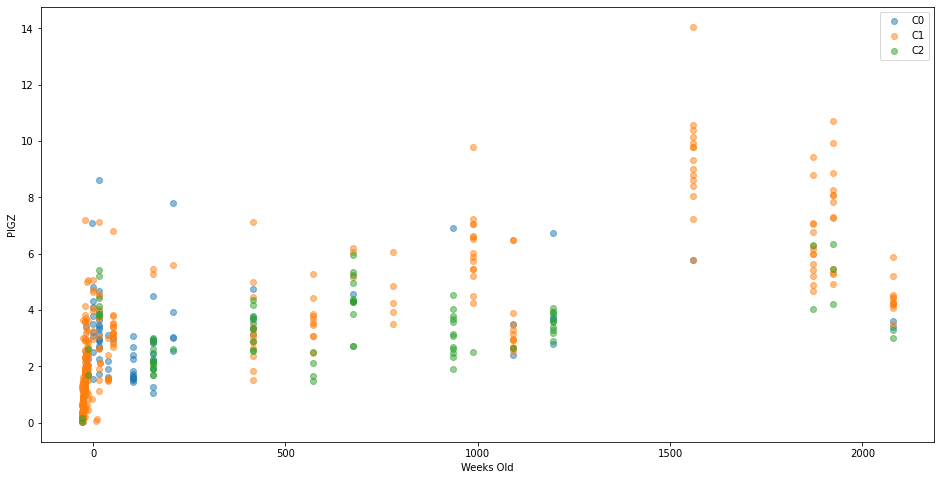

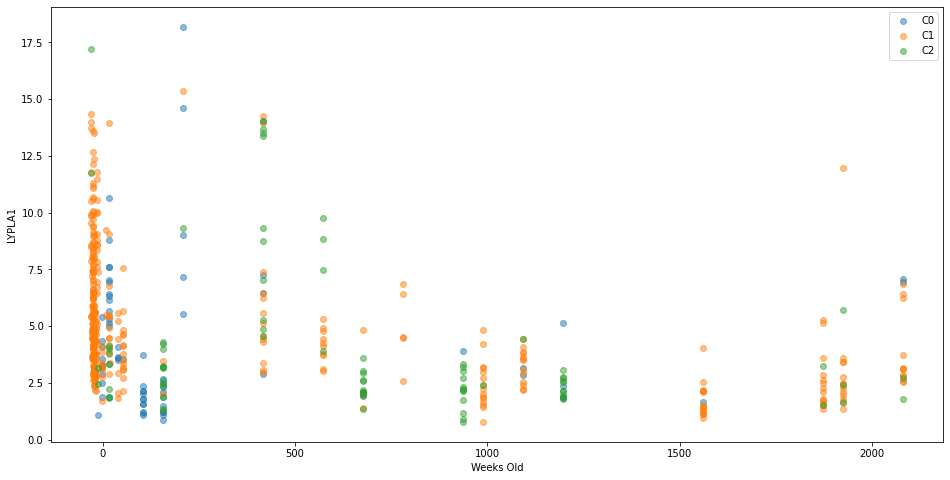

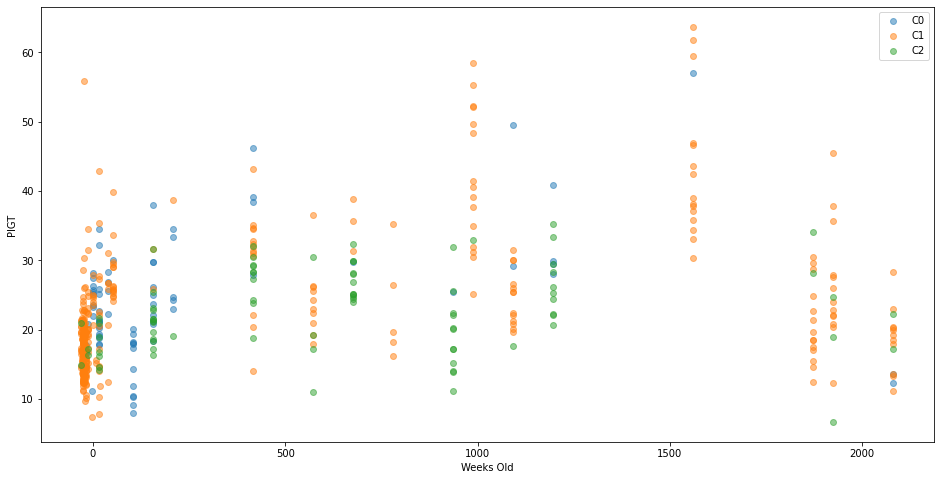

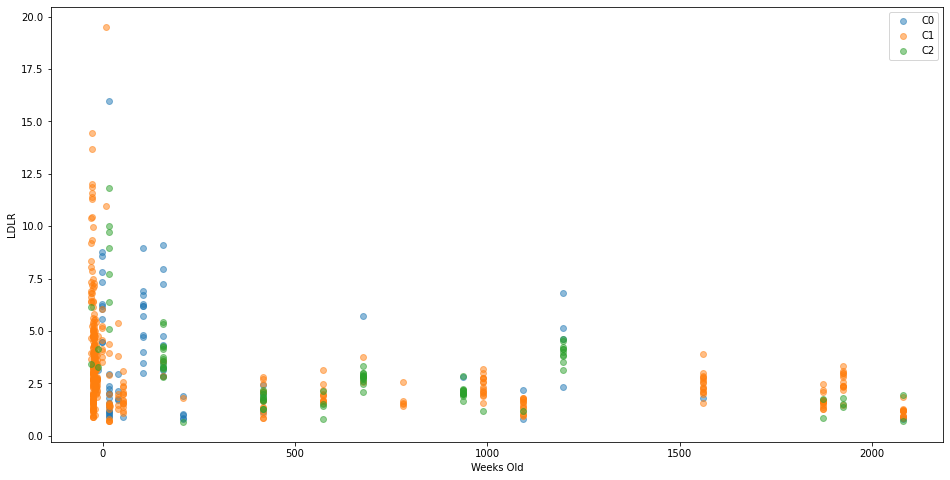

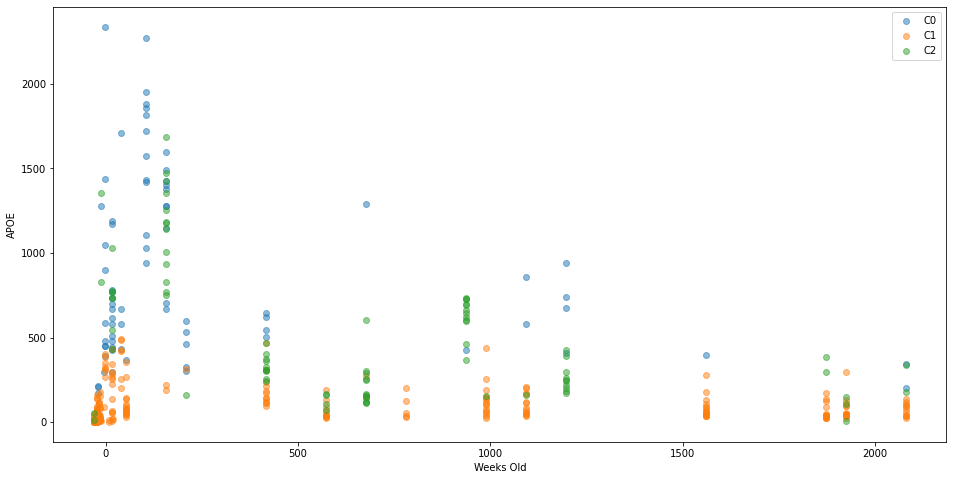

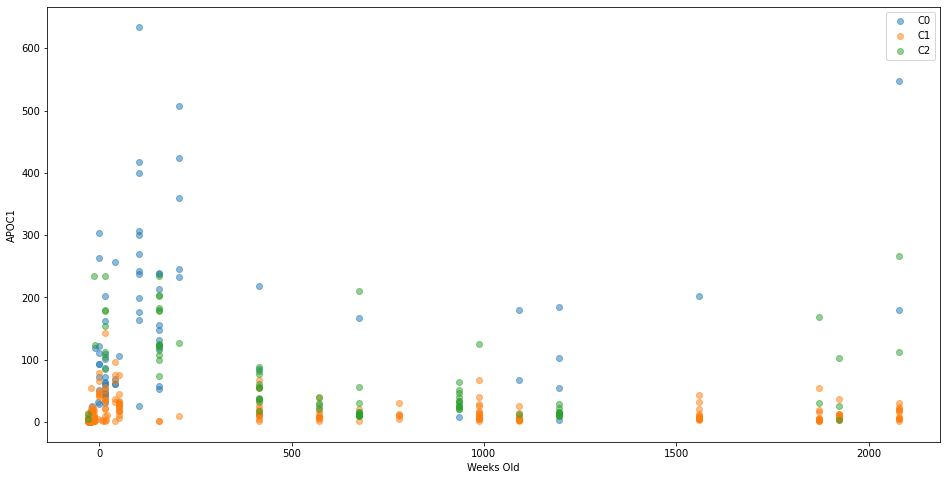

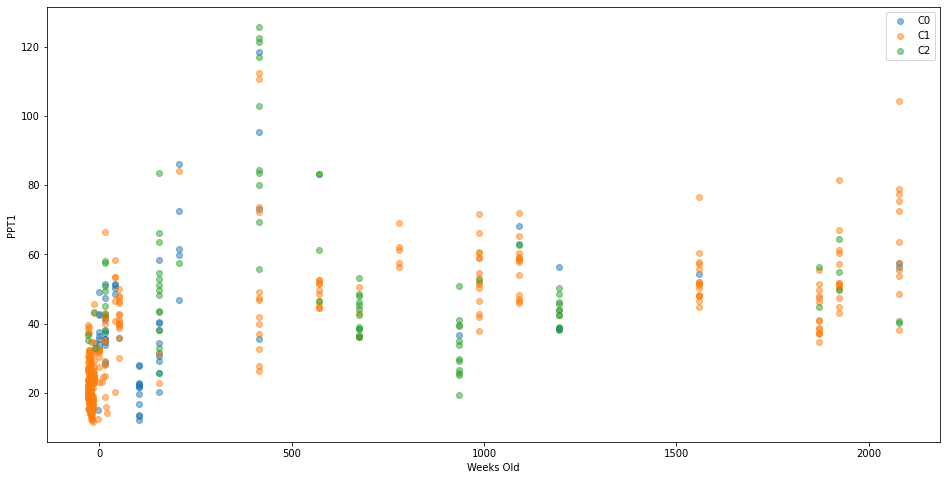

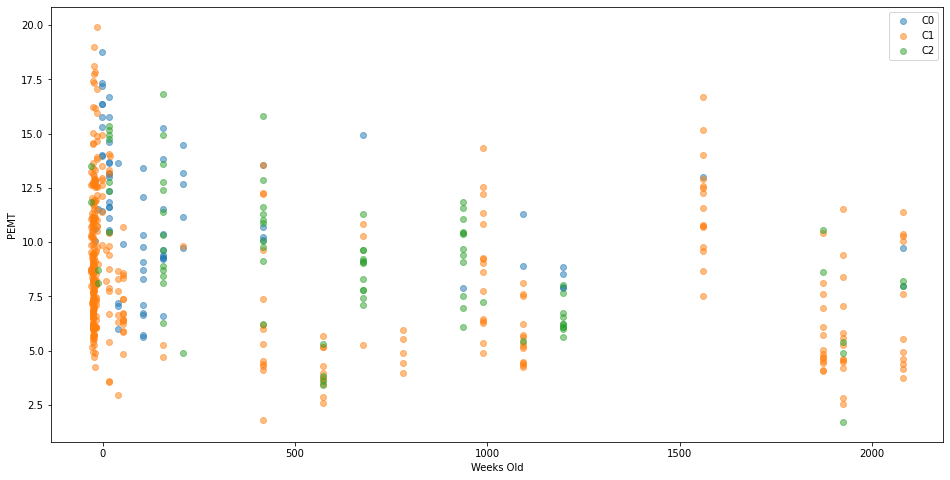

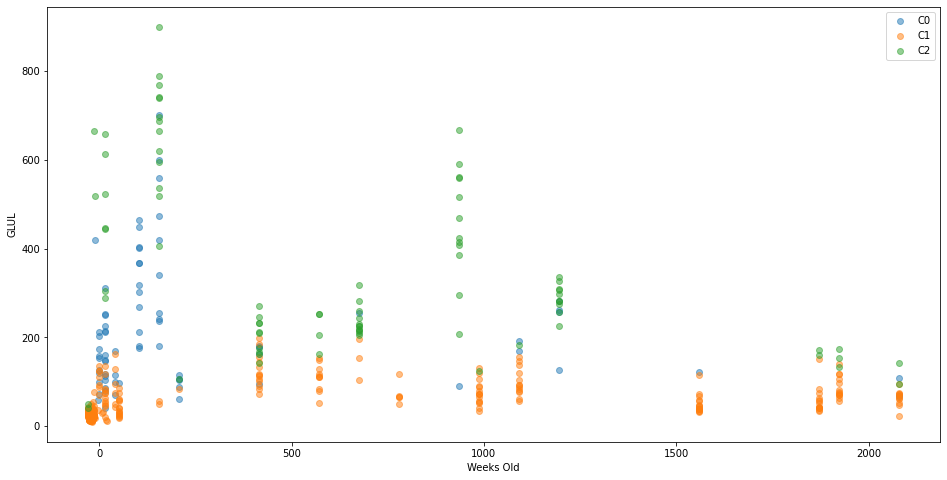

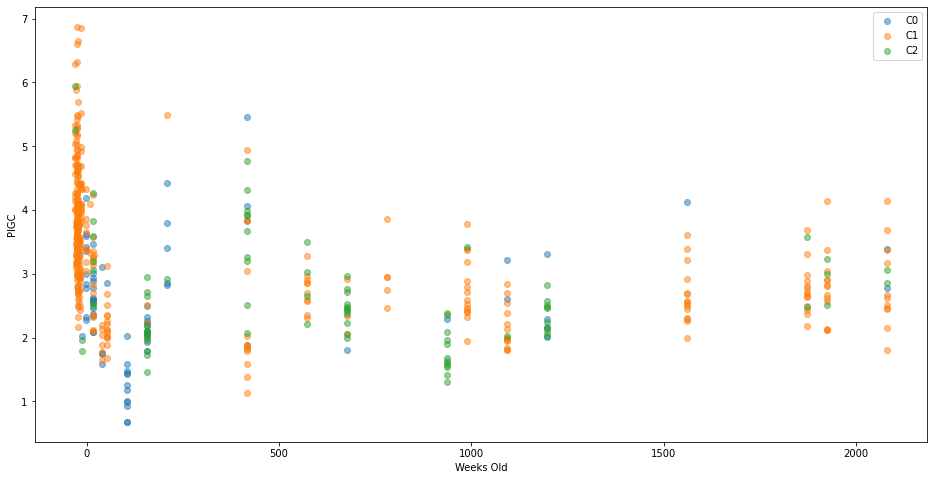

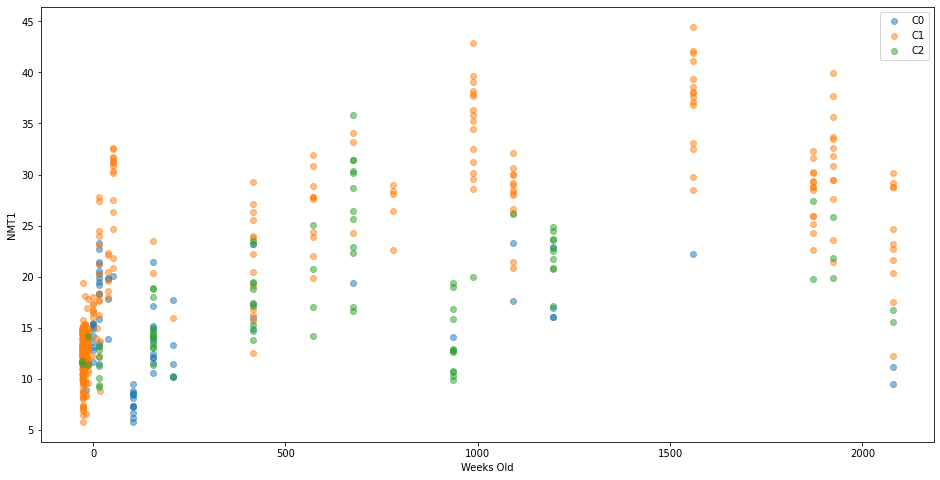

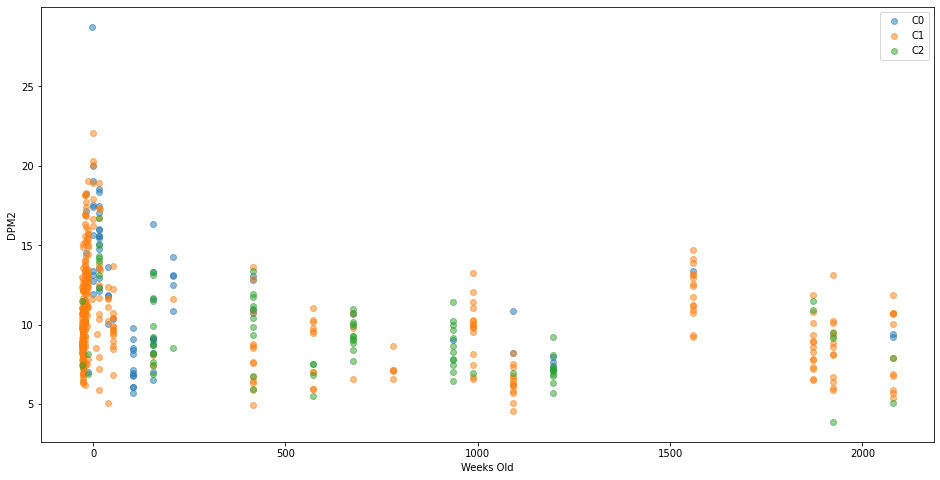

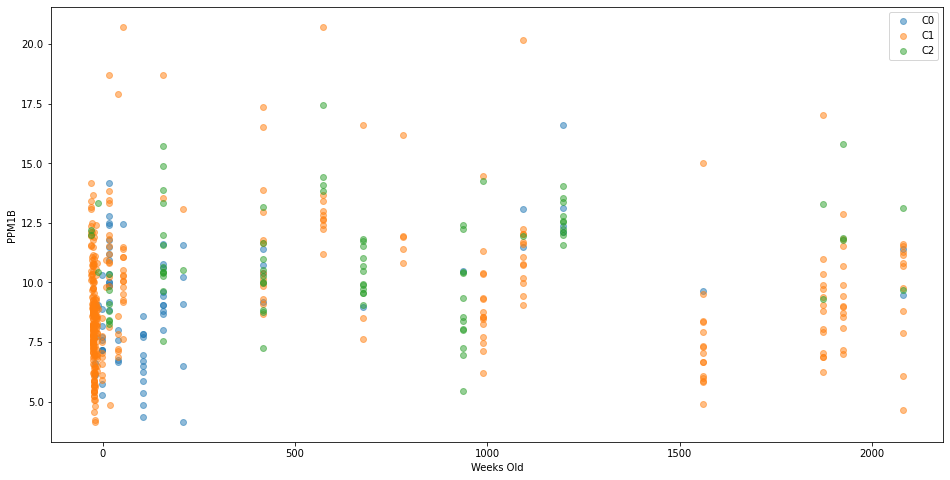

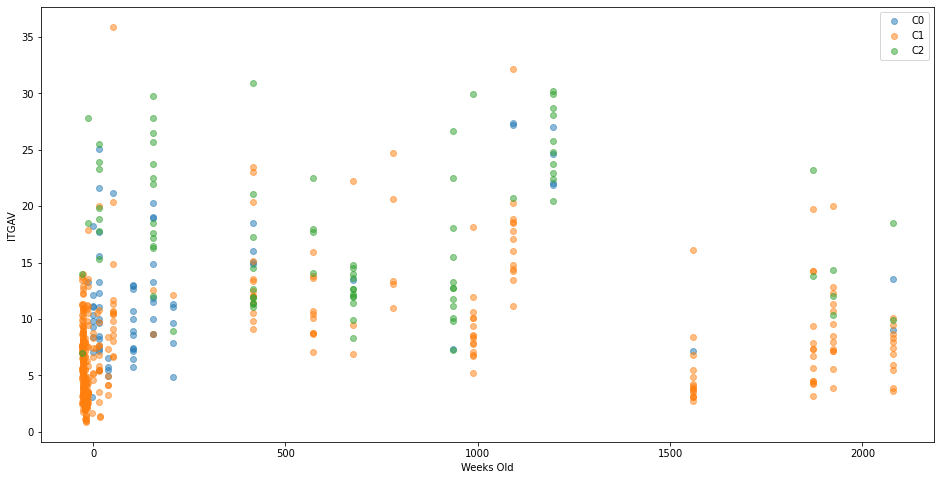

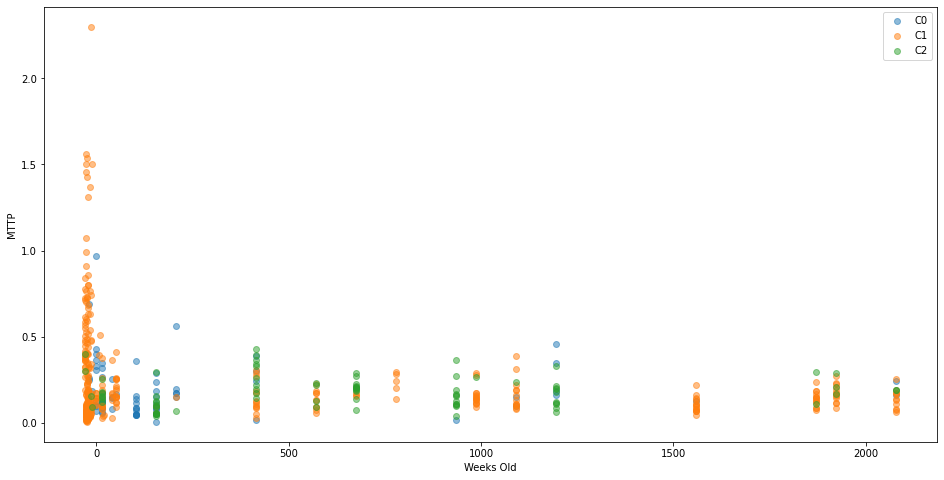

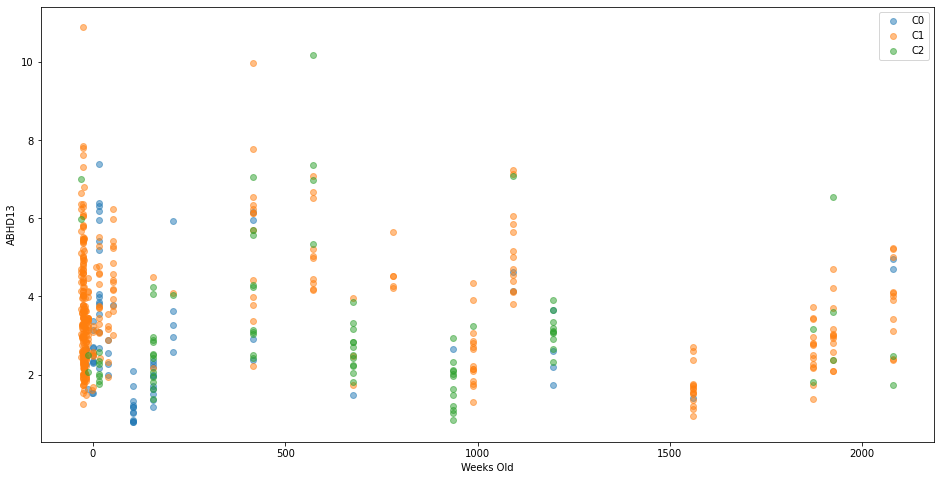

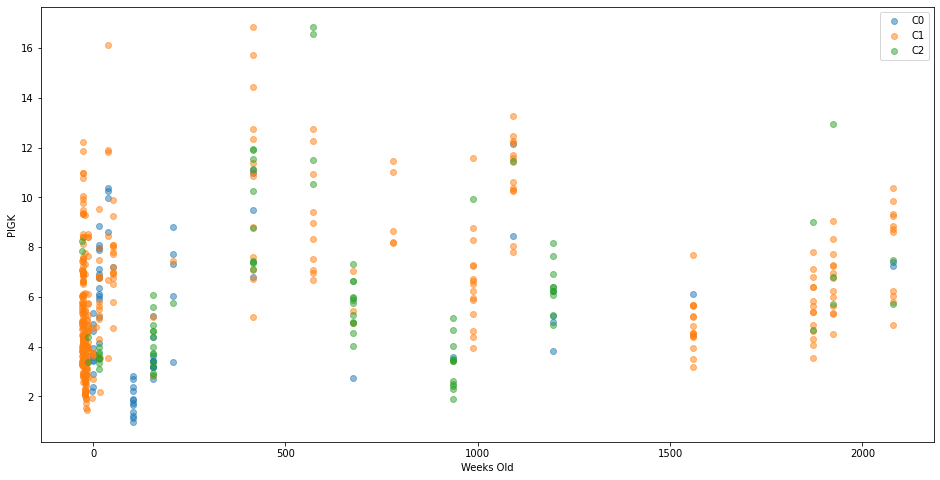

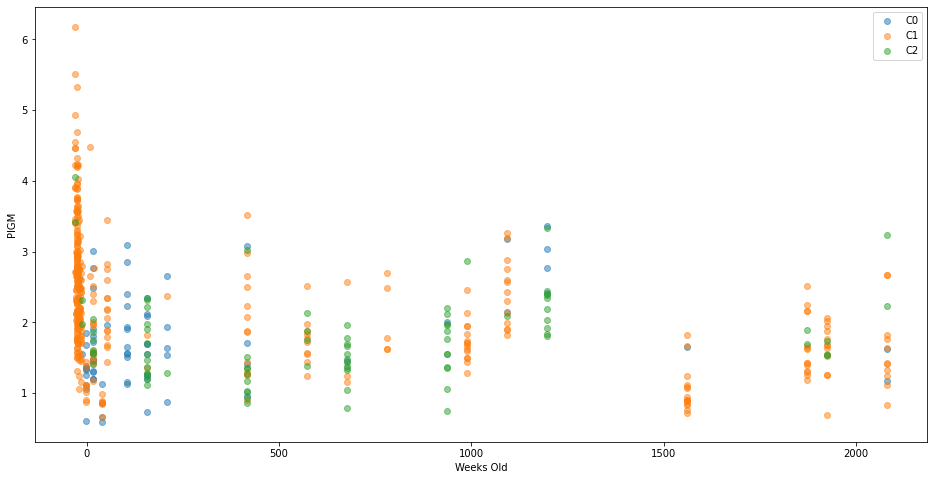

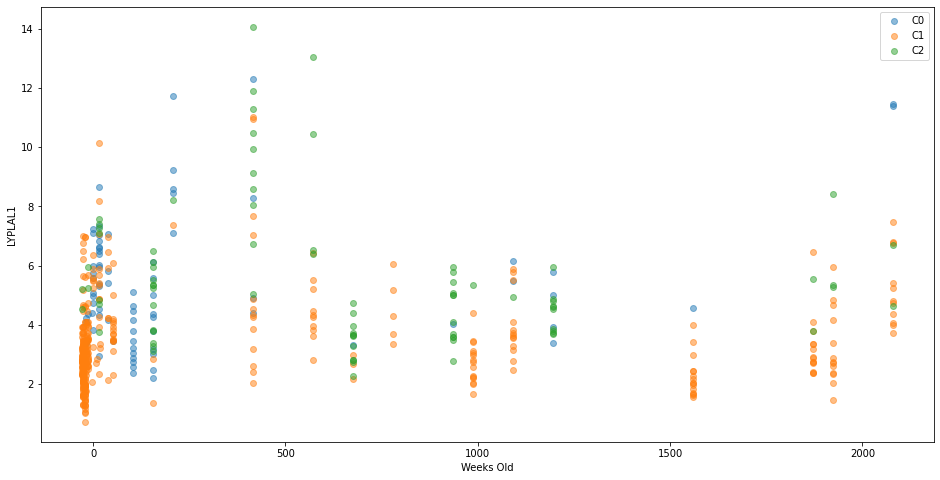

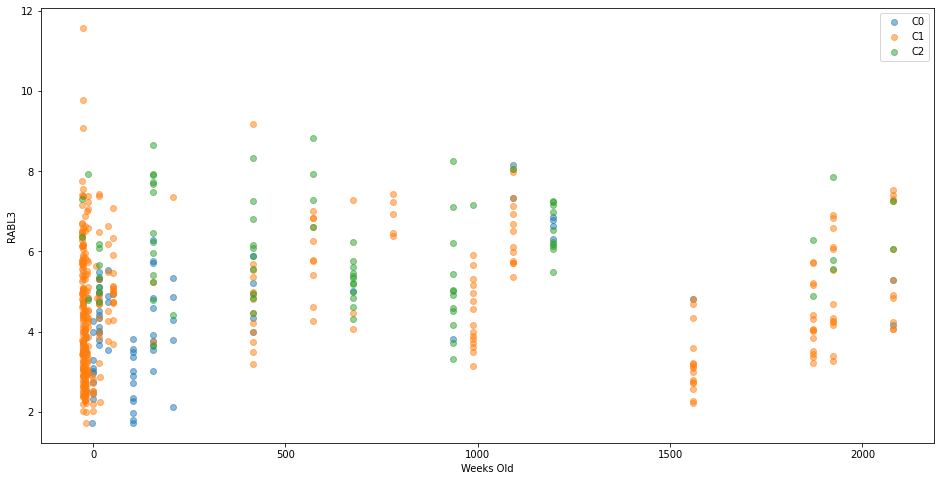

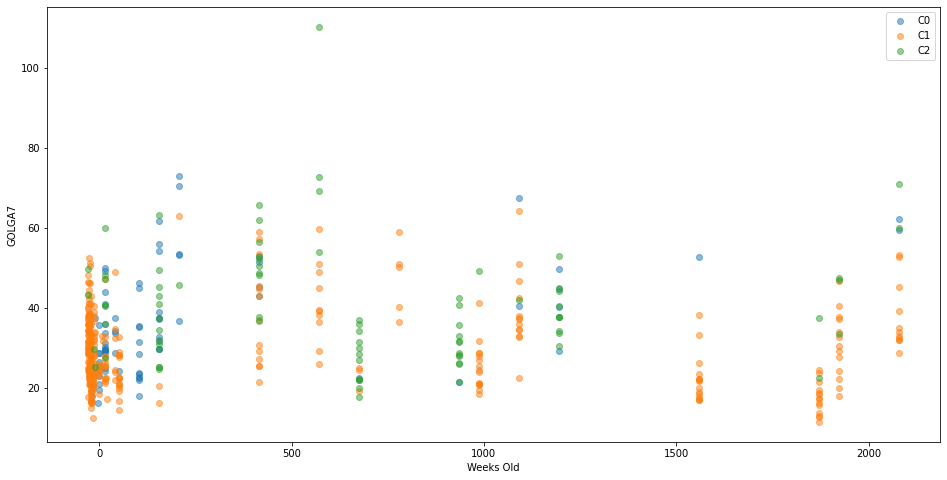

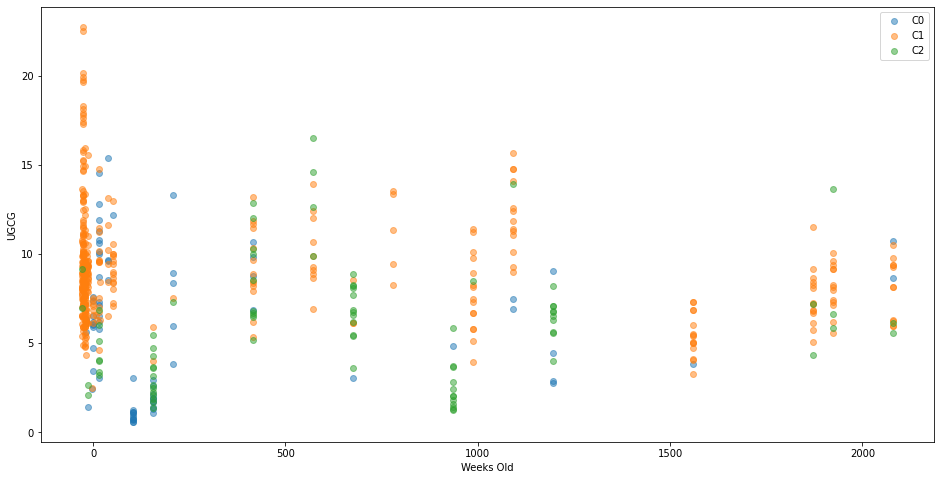

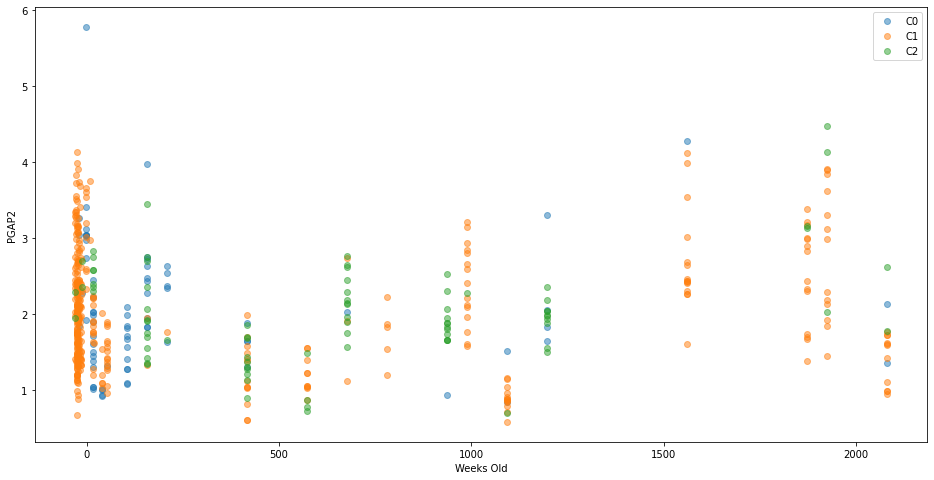

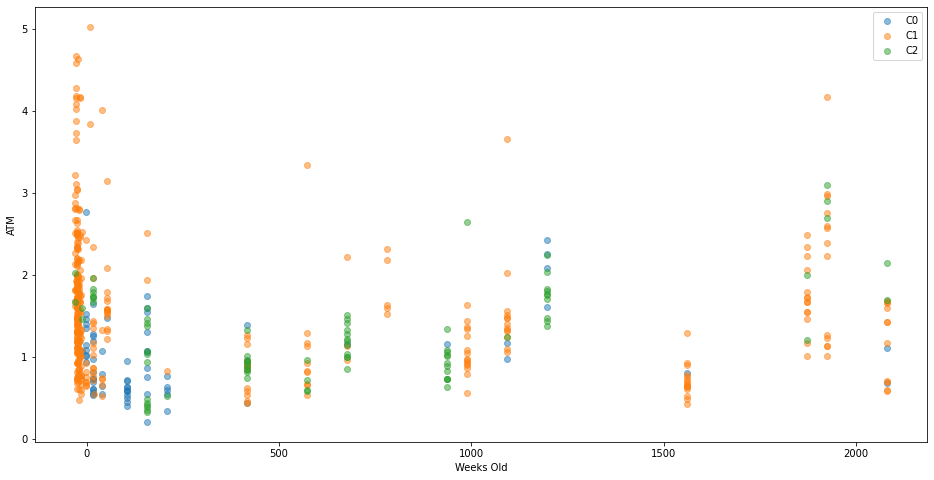

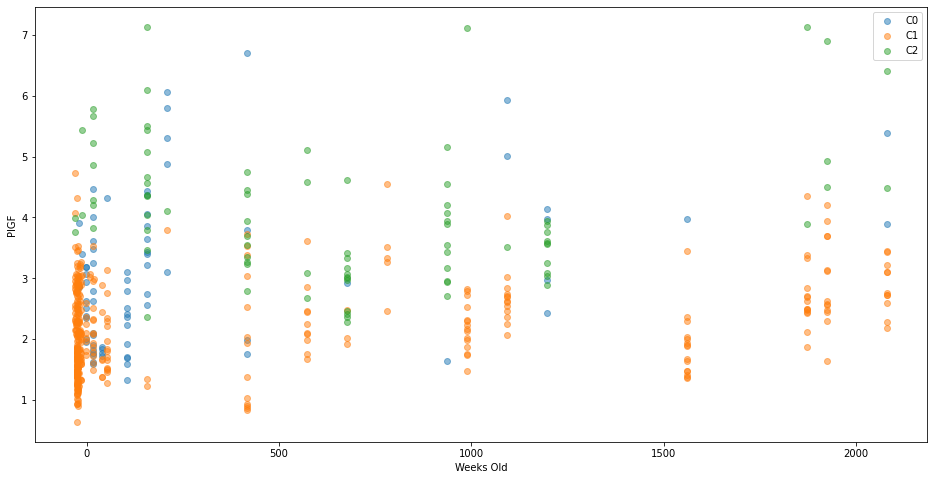

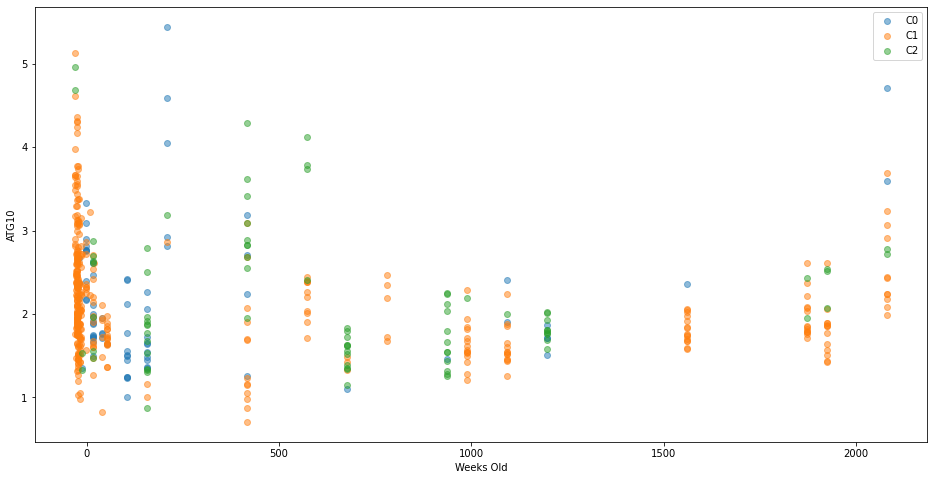

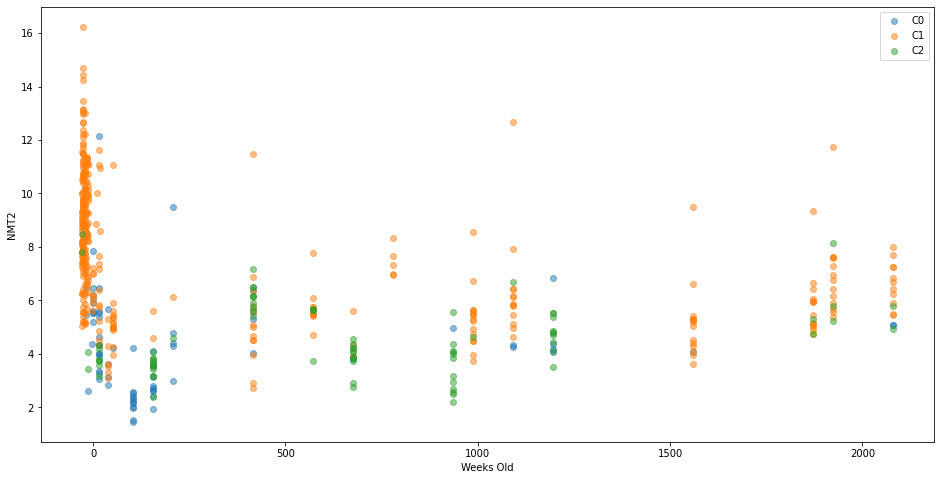

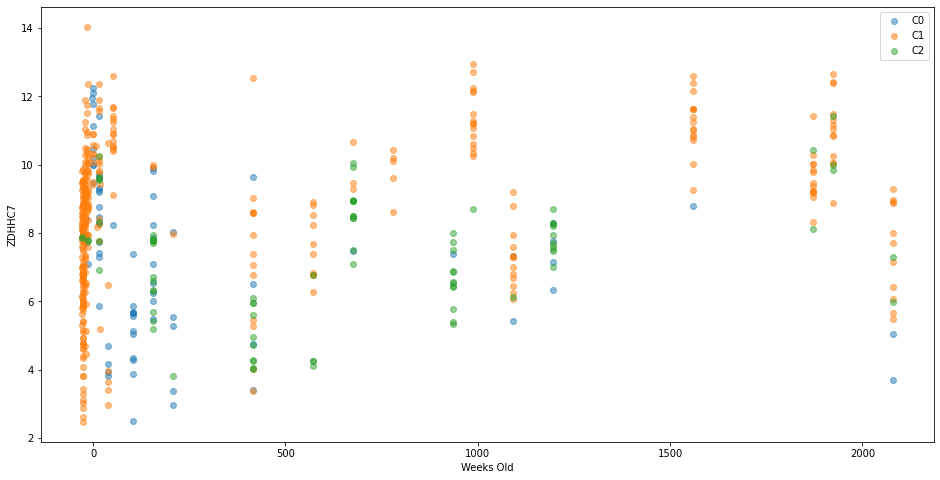

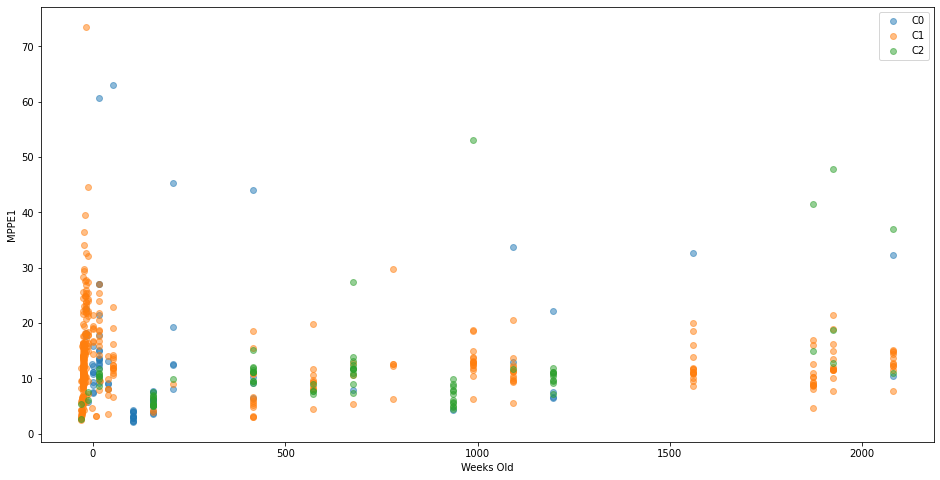

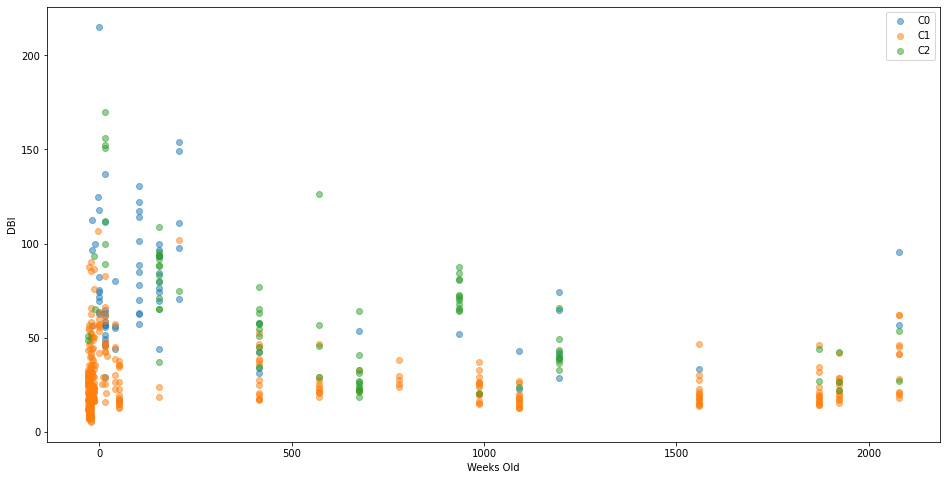

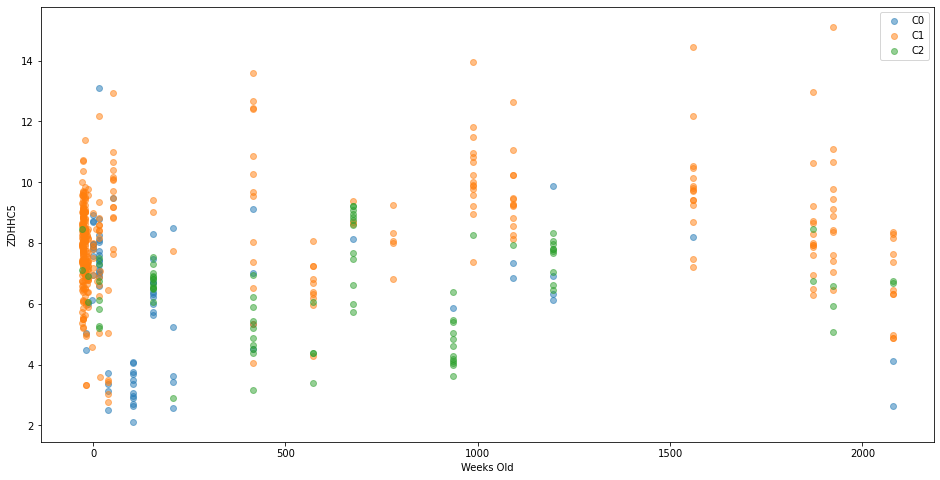

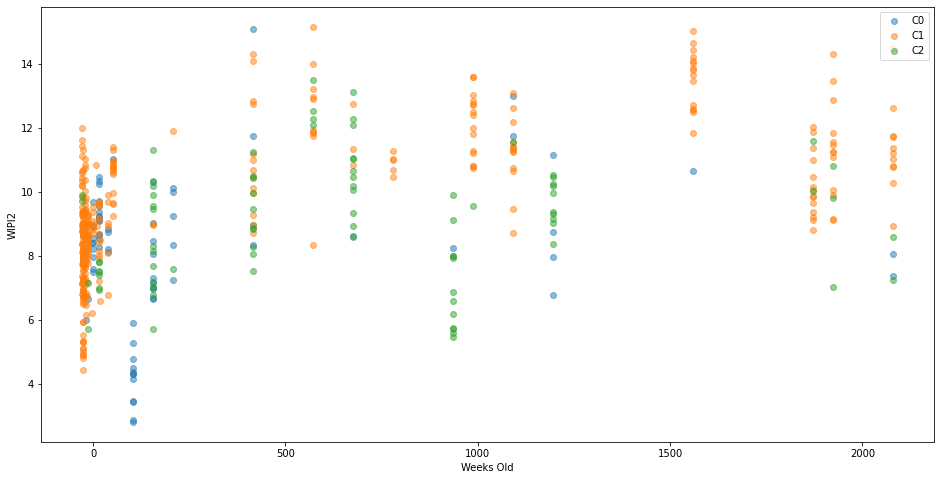

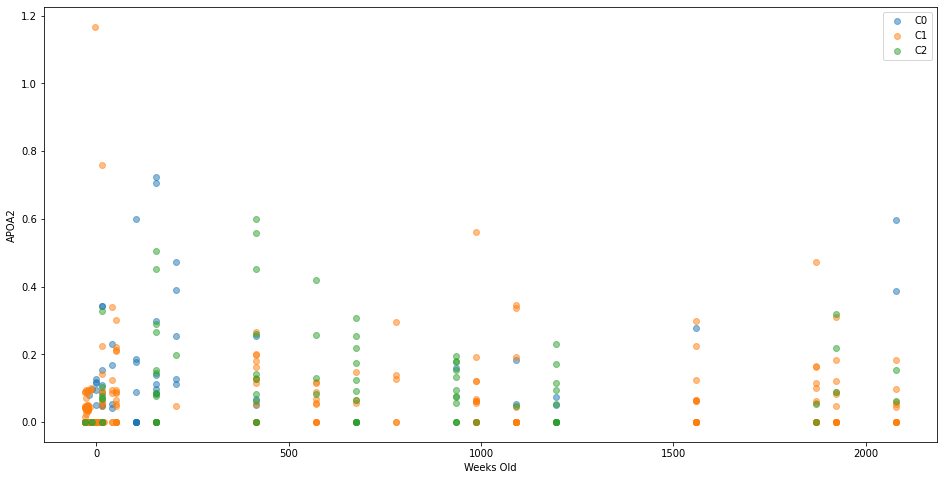

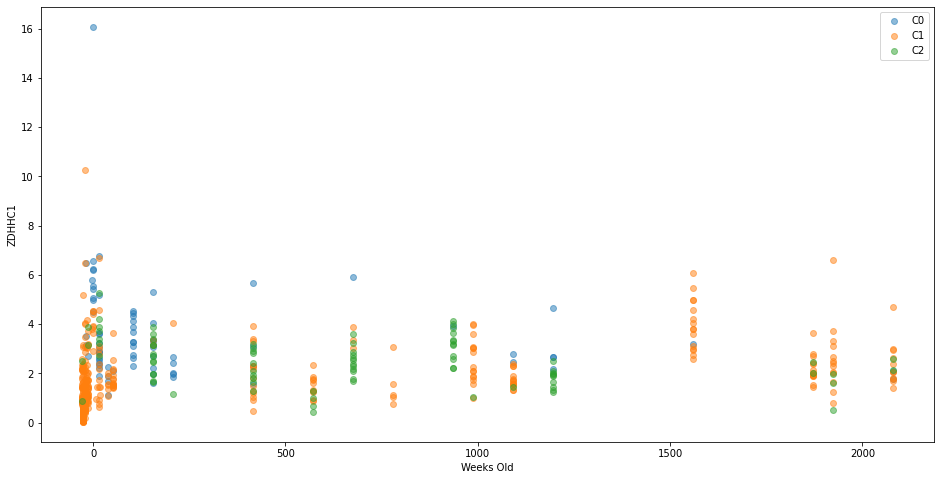

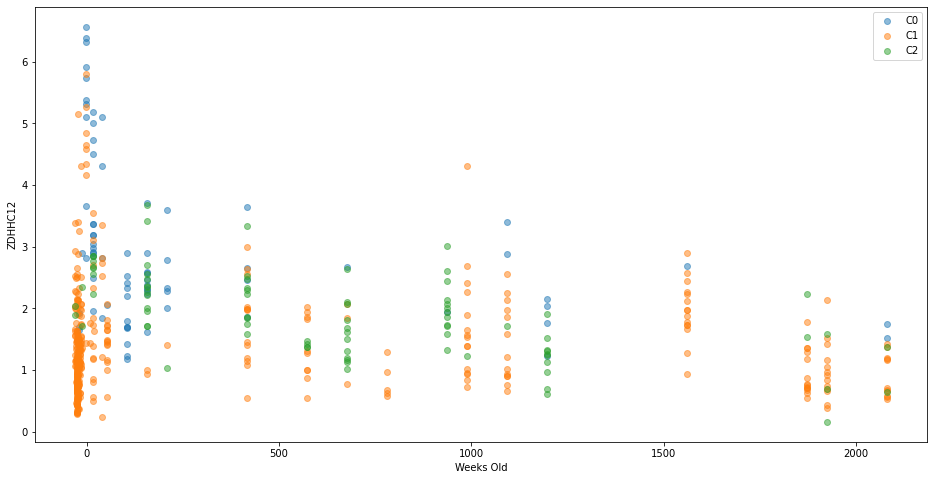

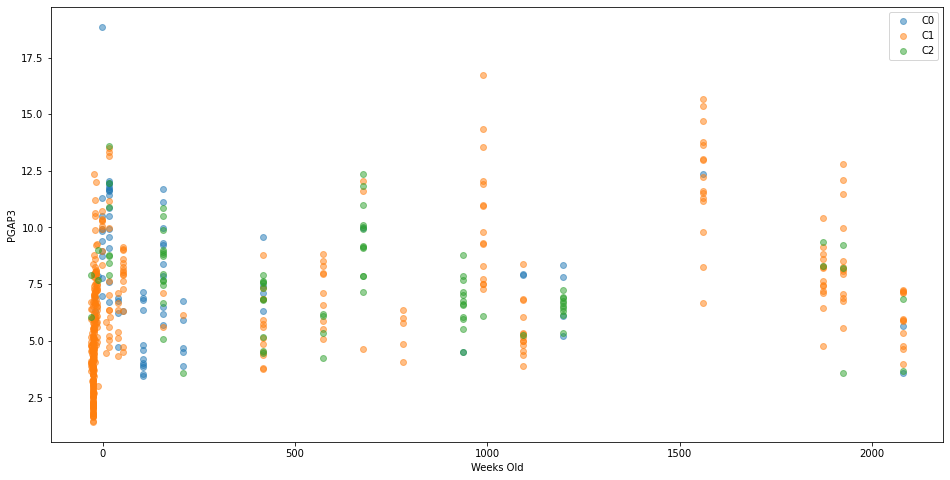

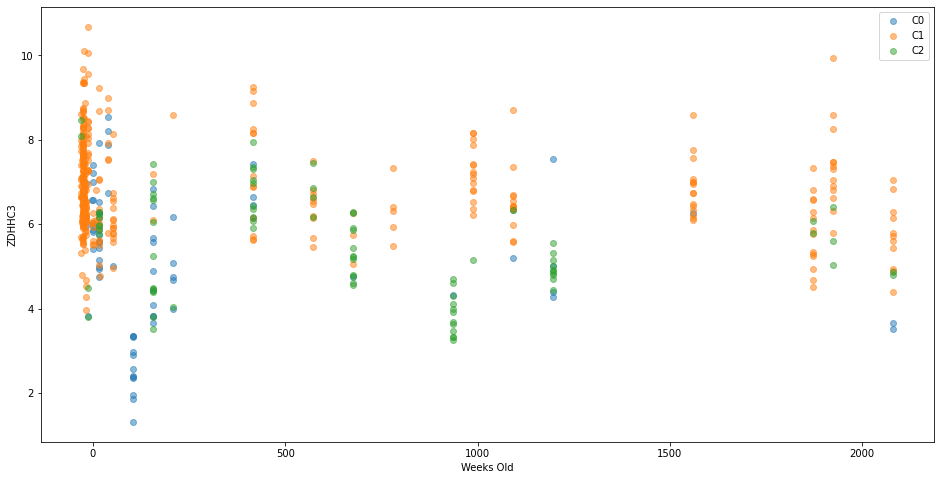

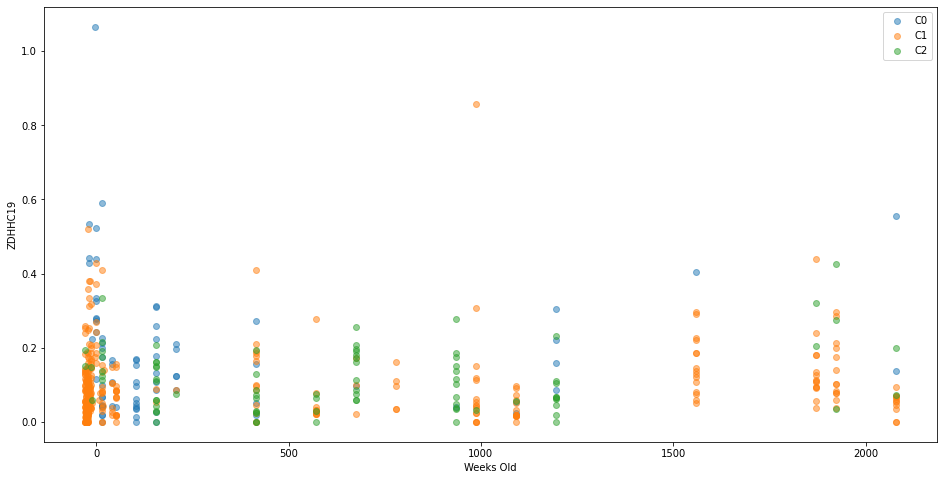

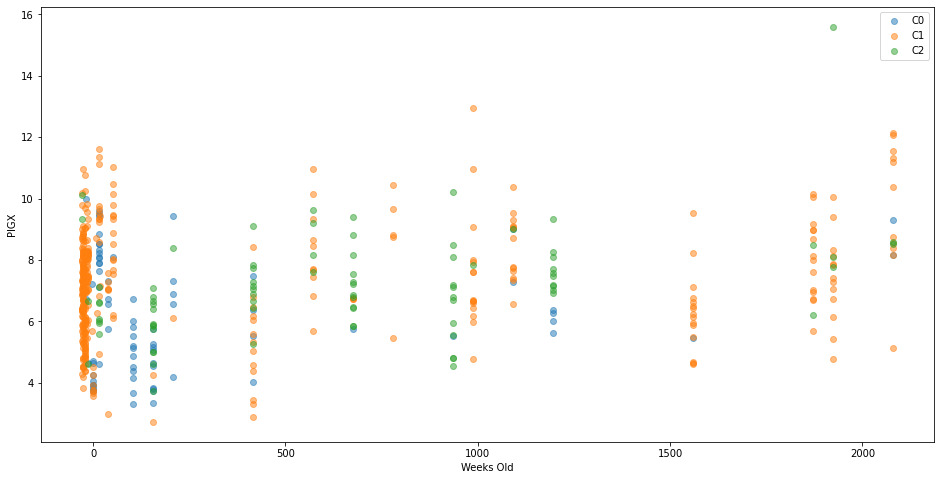

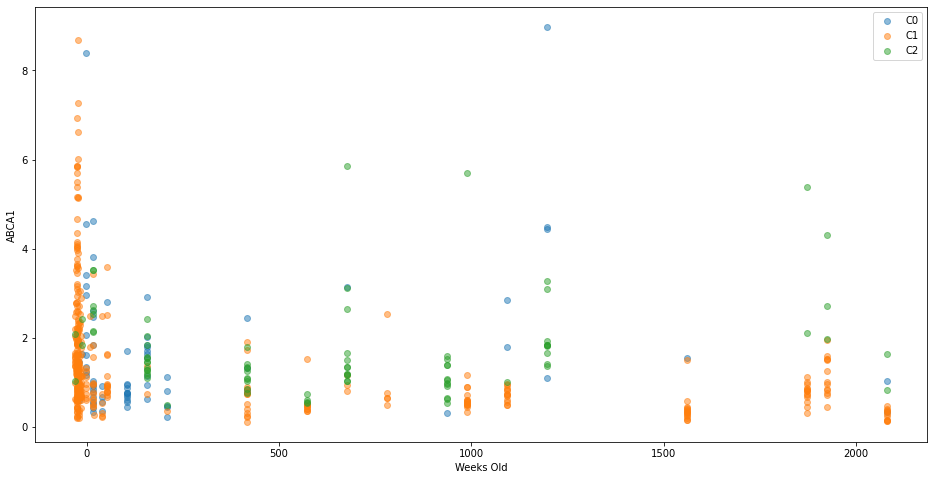

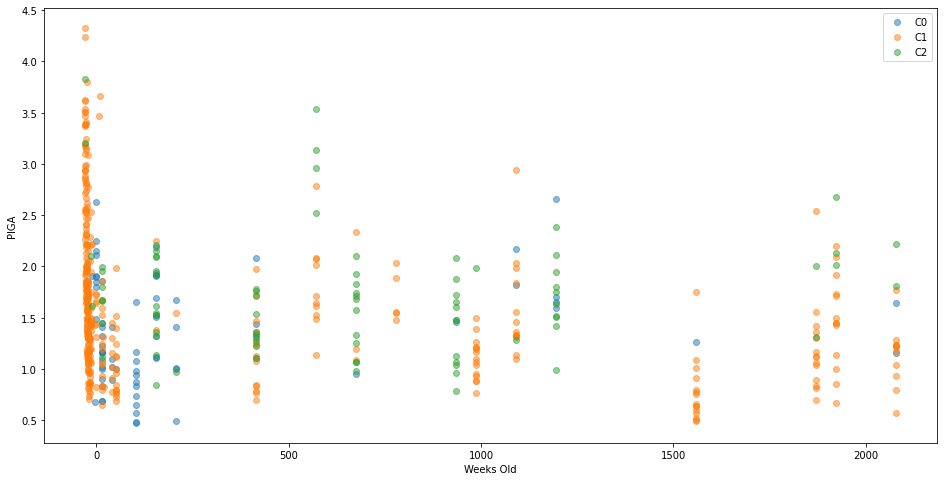

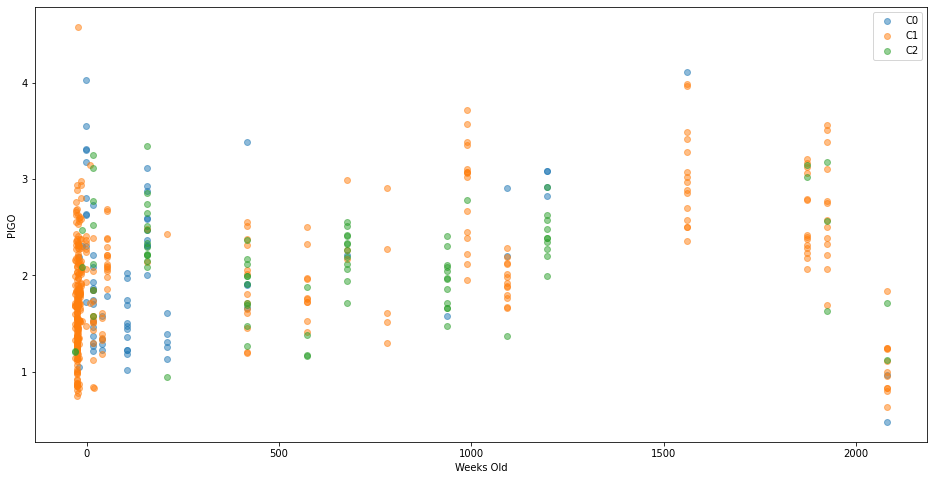

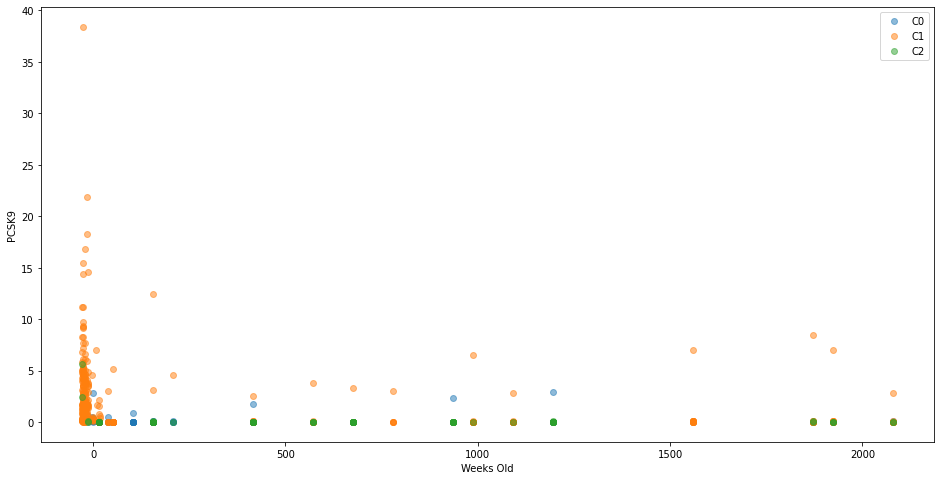

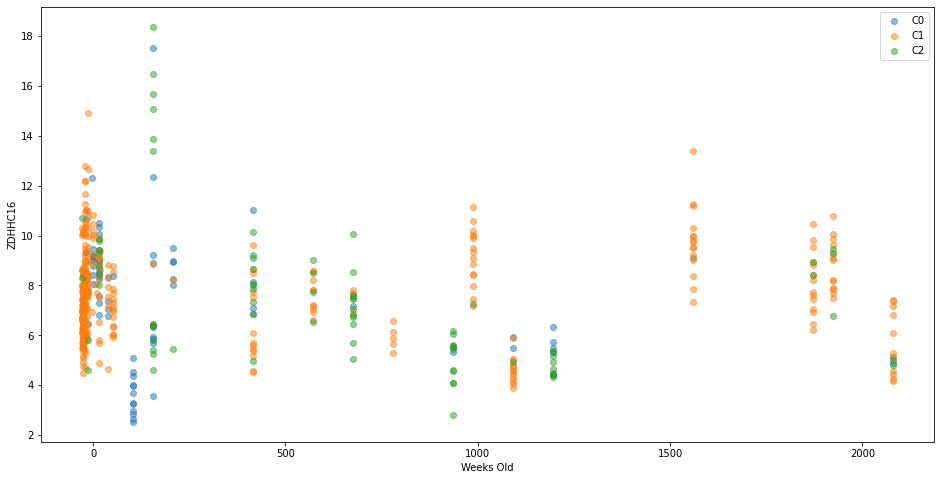

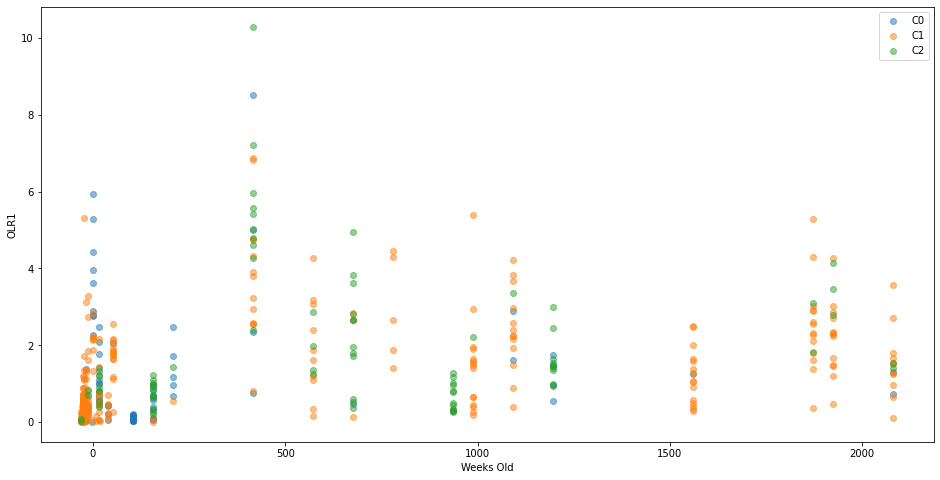

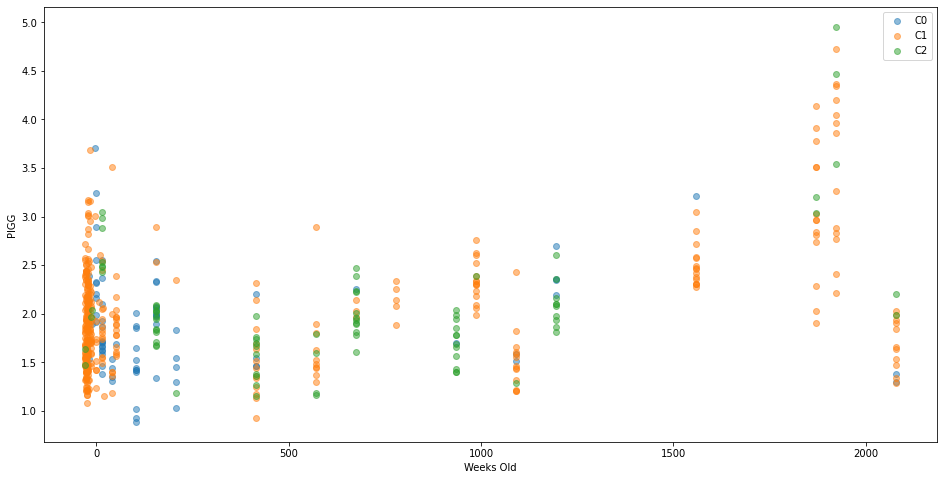

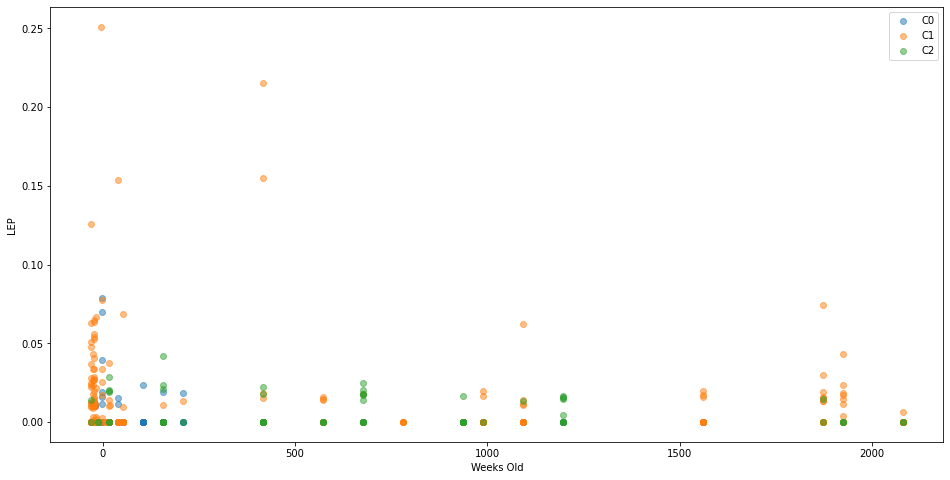

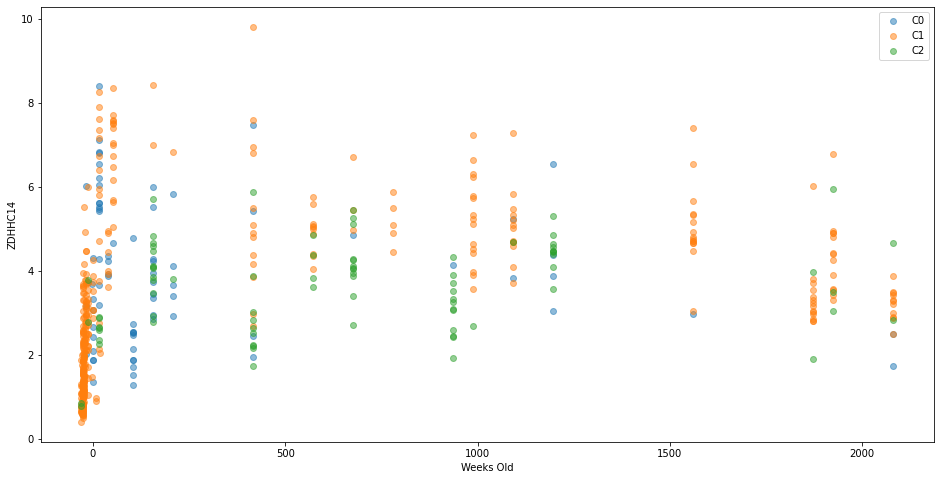

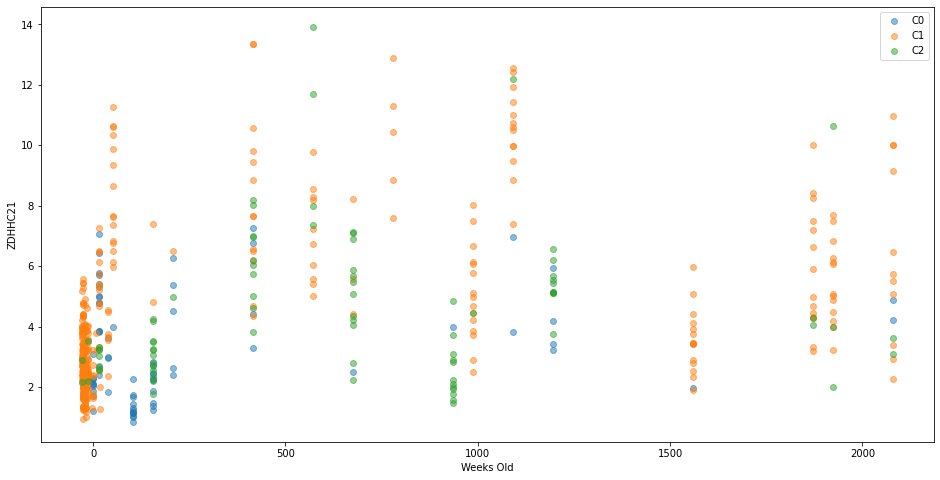

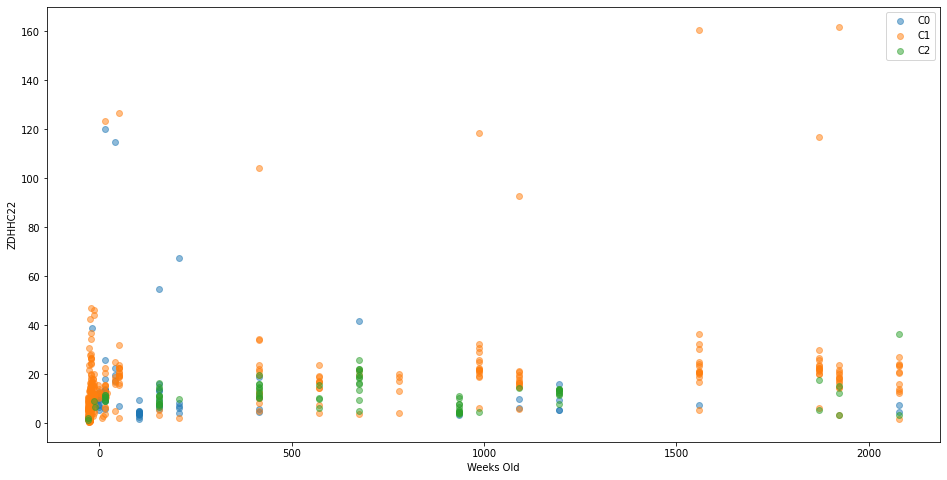

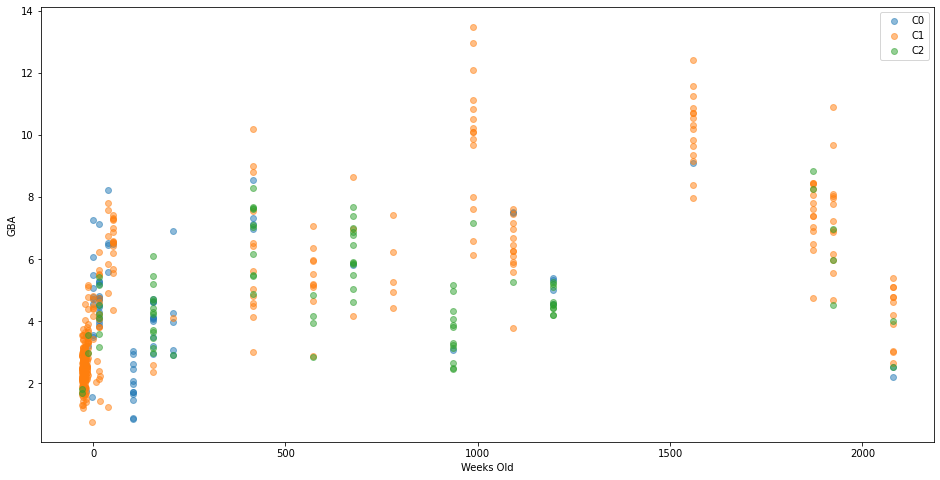

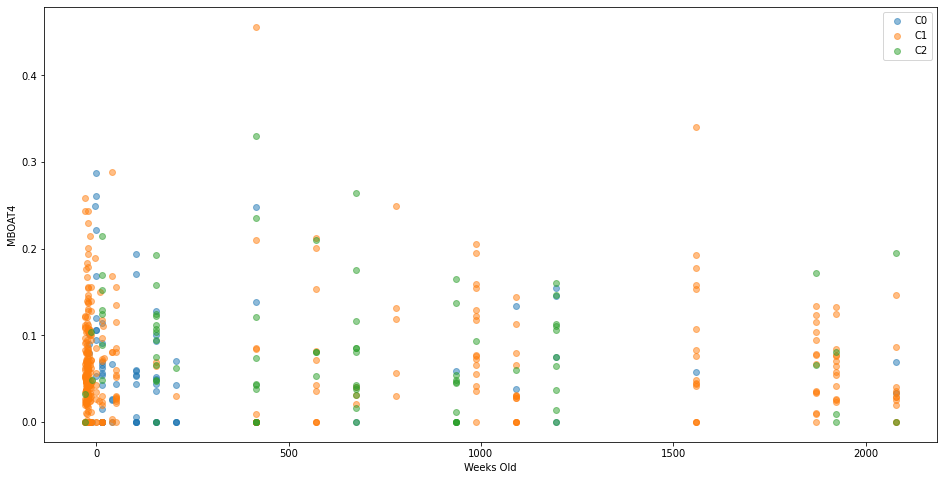

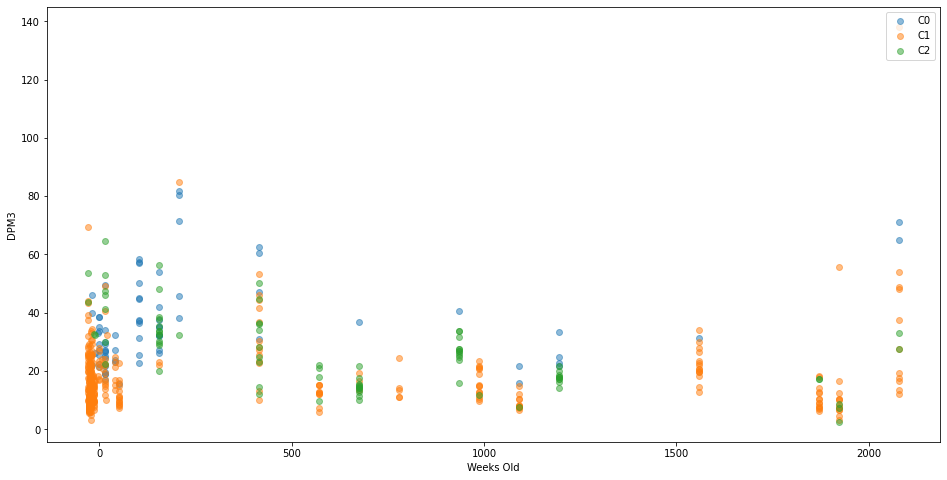

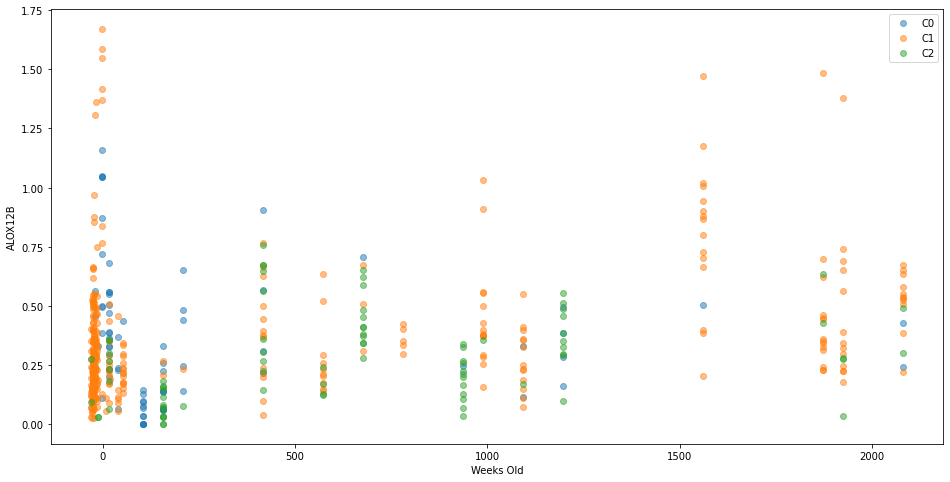

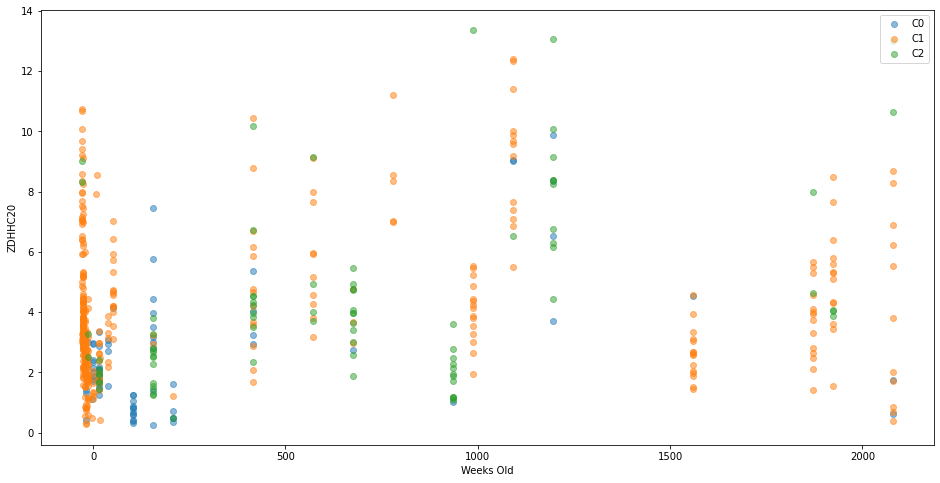

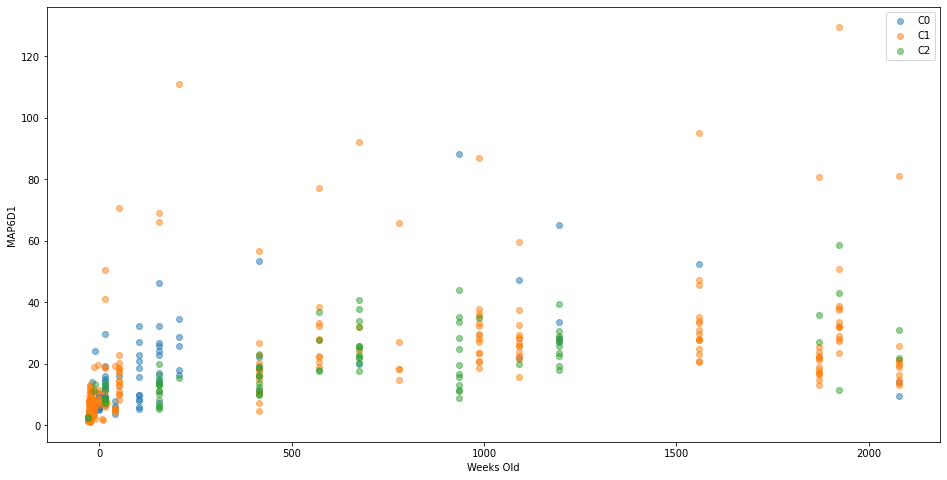

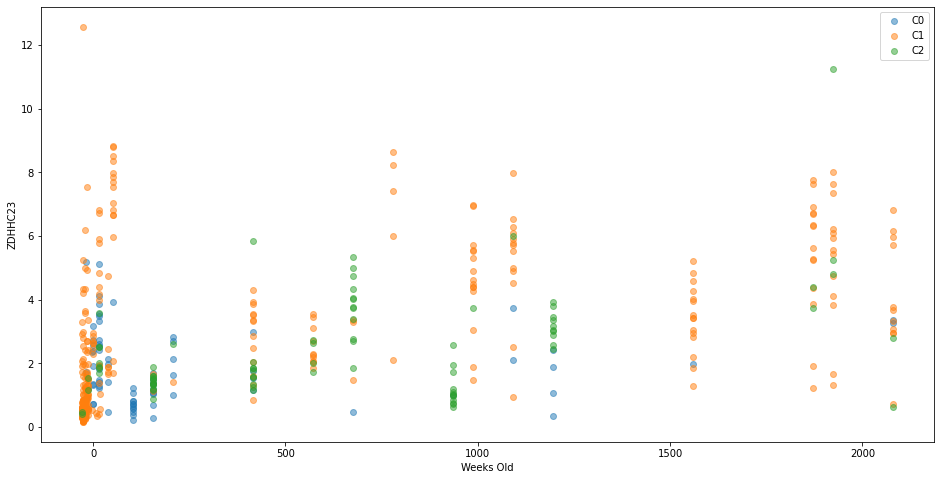

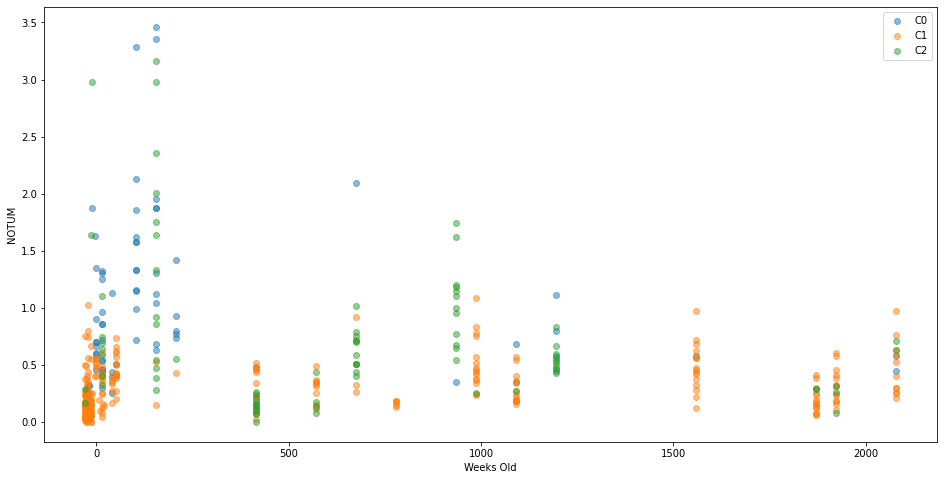

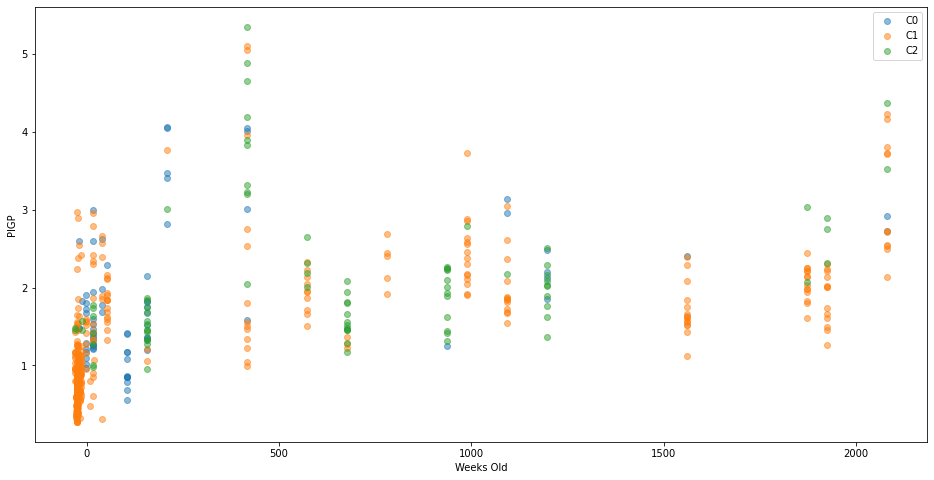

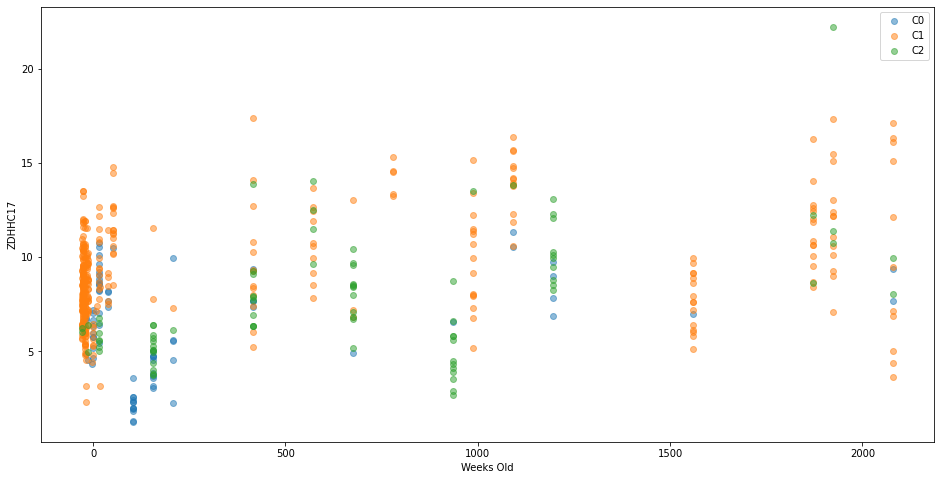

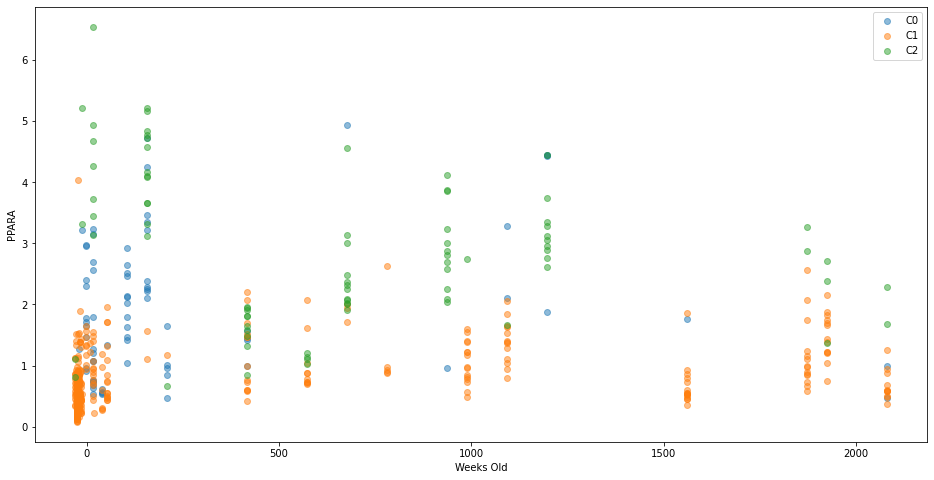

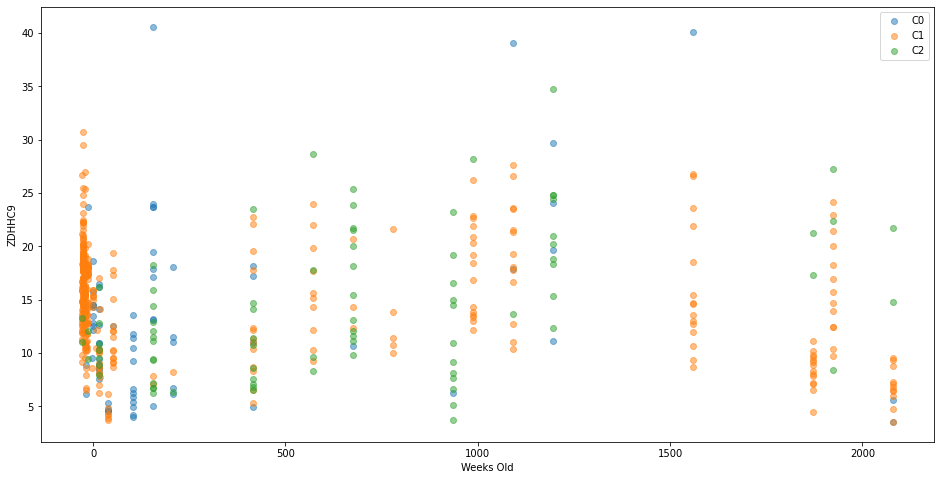

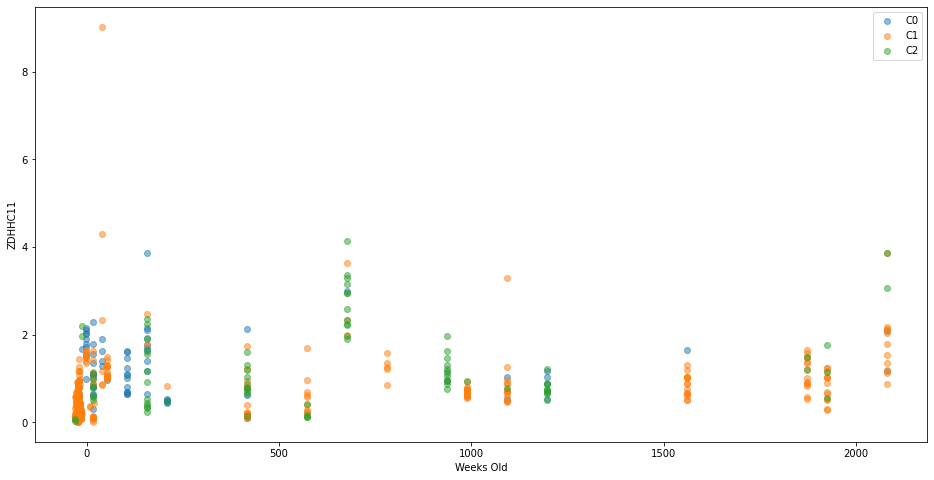

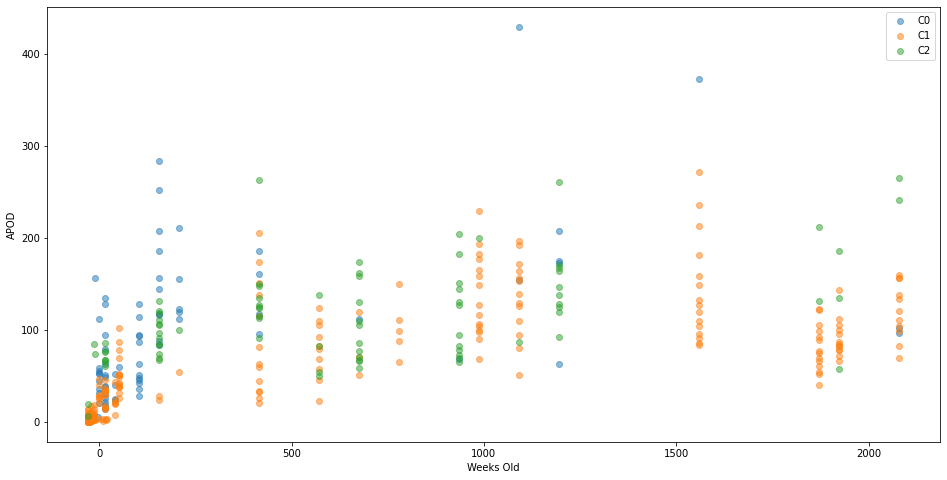

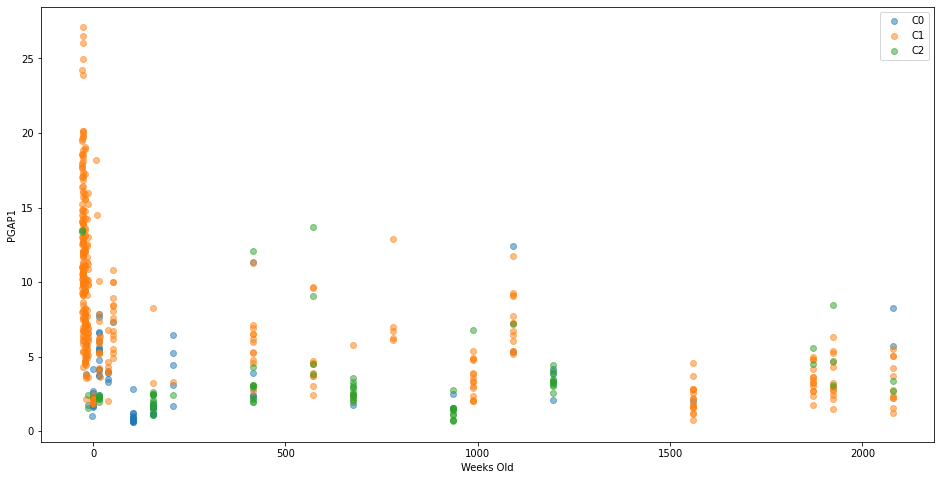

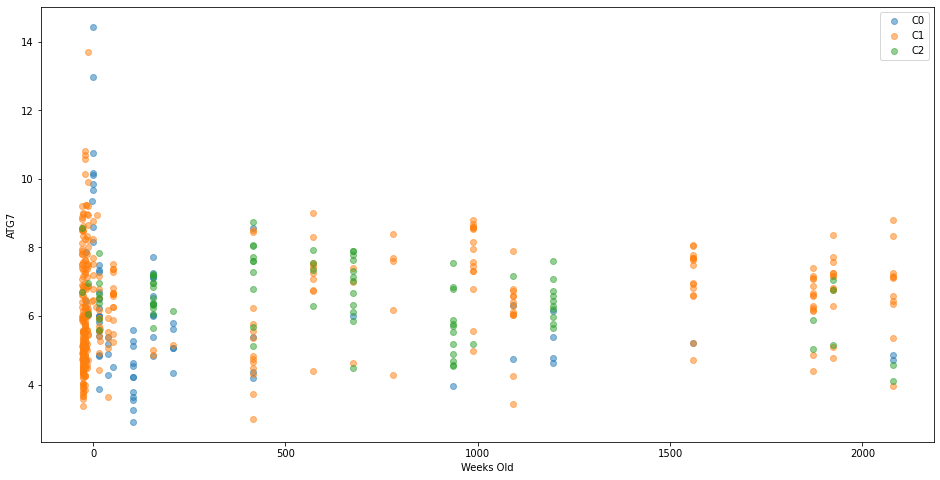

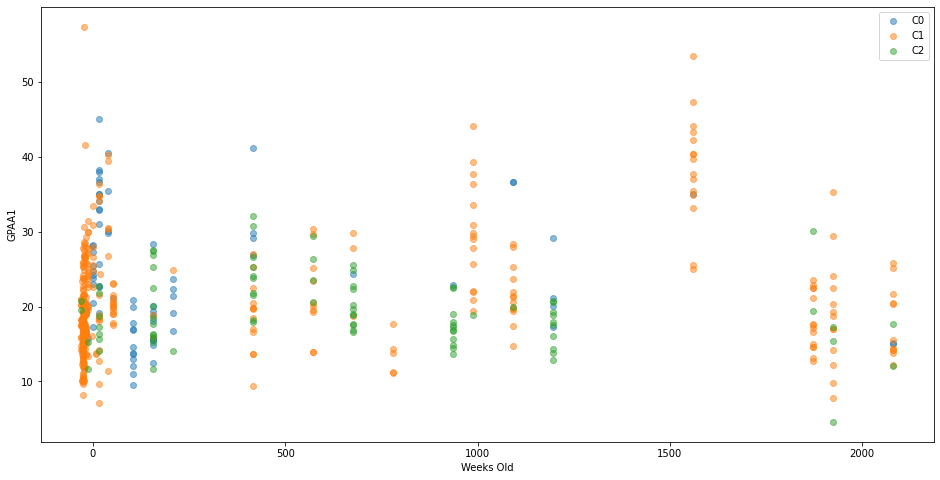

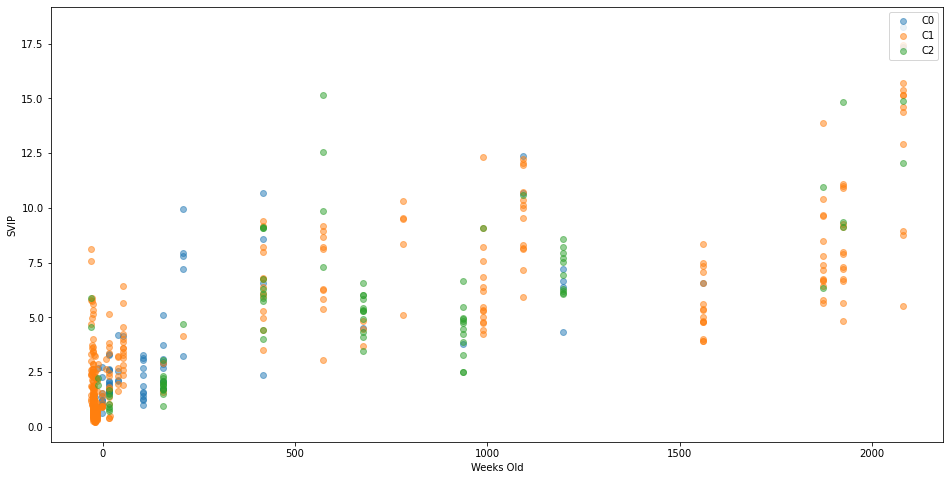

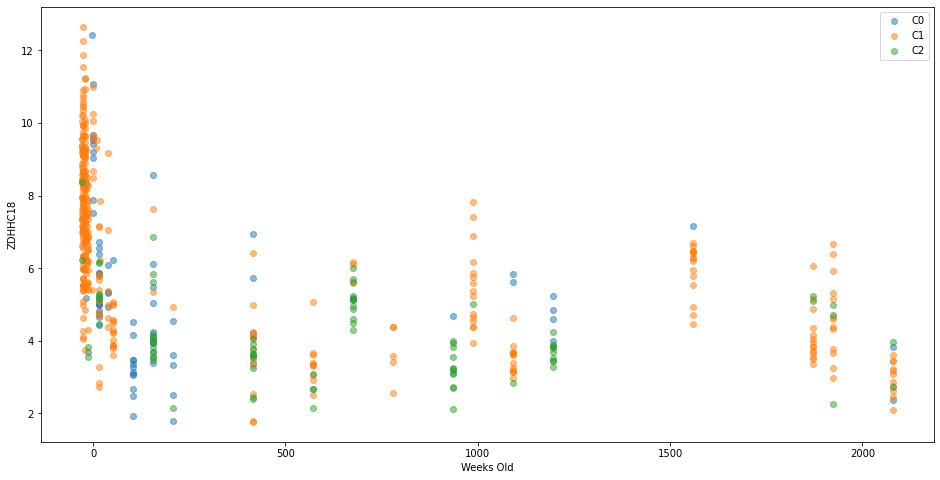

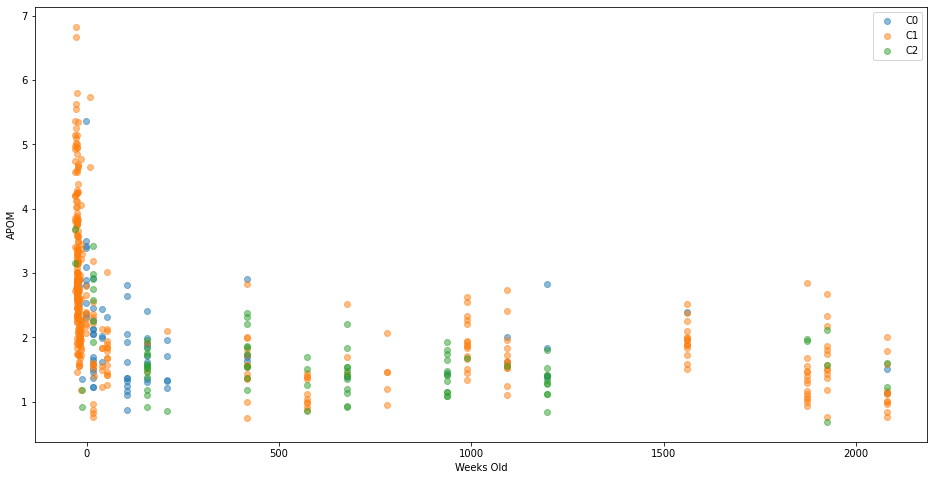

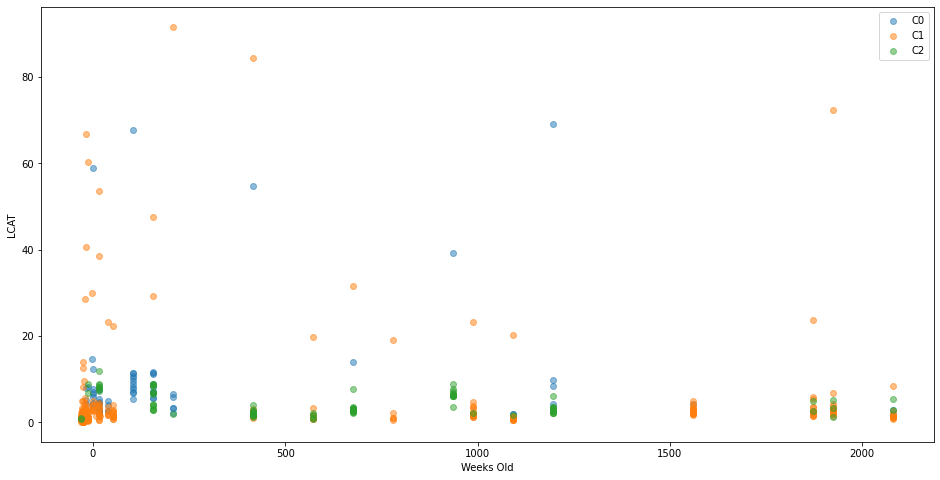

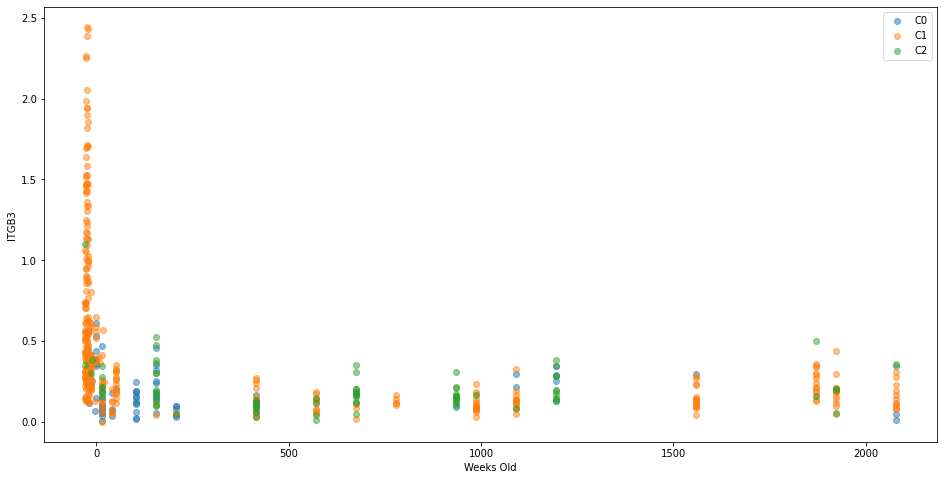

In [26]:
for x in range(len(W)):  
    plt.figure(figsize=(16,8))
    plt.scatter(C0ages, gene_df.iloc[x][C0s], label='C0',alpha=.5)
    plt.scatter(C1ages, gene_df.iloc[x][C1s], label='C1',alpha=.5)
    plt.scatter(C2ages, gene_df.iloc[x][C2s], label='C2',alpha=.5)
    plt.ylabel(genes[x])
    plt.xlabel('Weeks Old')
    plt.legend(loc='upper right')

In [30]:
C0_age_d={}
C1_age_d={}
C2_age_d={}
x=0
for sample in C0ages:
    if sample in C0_age_d.keys():
        C0_age_d[sample].append(C0s[x])
    else:
        C0_age_d[sample] = [C0s[x]]
        
    x+=1

    
# print(C0_age_d)                

y=0
for sample in C1ages:
    if sample in C1_age_d.keys():
        C1_age_d[sample].append(C1s[y])
    else:
        C1_age_d[sample] = [C1s[y]]
        
    y+=1        
        
# print(C1_age_d)
z=0
for sample in C2ages:
    if sample in C2_age_d.keys():
        C2_age_d[sample].append(C2s[z])
    else:
        C2_age_d[sample] = [C2s[z]]
        
    z+=1        
        
# print(C2_age_d)         

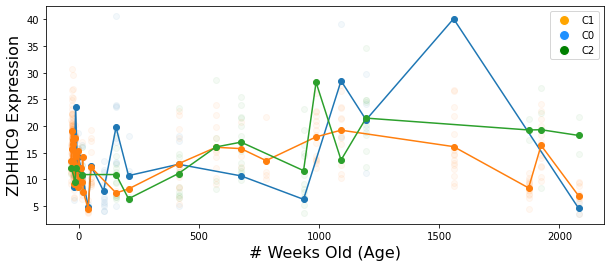

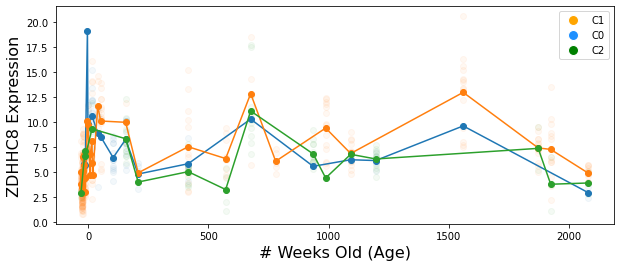

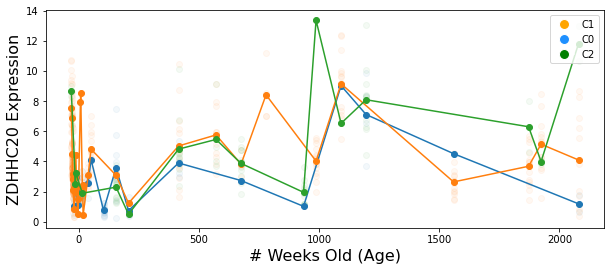

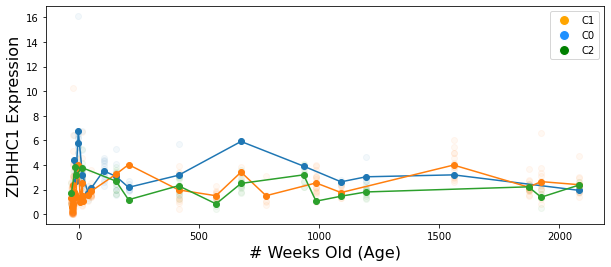

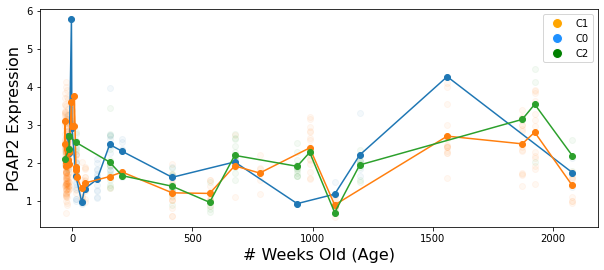

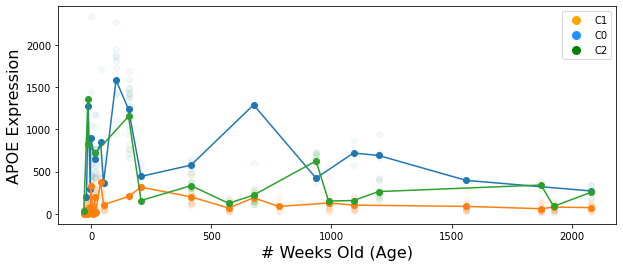

In [28]:
figsizes = (10, 4)
genes = ['ZDHHC9', 'ZDHHC8', 'ZDHHC20', 'ZDHHC1', 'PGAP2','APOE']
for gene in genes:
    C0_keys = sorted(C0_age_d.keys())
    C0_means = [gene_df.loc[gene, C0_age_d[x]].mean() for x in C0_keys]
    
    C1_keys = sorted(C1_age_d.keys())
    C1_means = [gene_df.loc[gene, C1_age_d[x]].mean() for x in C1_keys]
    
    C2_keys = sorted(C2_age_d.keys())
    C2_means = [gene_df.loc[gene, C2_age_d[x]].mean() for x in C2_keys]
    
    plt.figure(figsize=figsizes)
    plt.scatter(C0ages, gene_df.loc[gene][C0s], label='C0', alpha=0.05)
    plt.scatter(C1ages, gene_df.loc[gene][C1s], label='C1', alpha=0.05)
    plt.scatter(C2ages, gene_df.loc[gene][C2s], label='C2', alpha=0.05)
    plt.plot(C0_keys, C0_means, '-o')
    plt.plot(C1_keys, C1_means, '-o')
    plt.plot(C2_keys, C2_means, '-o')
    line1 = pylab.Line2D(range(1),range(1),color='white', marker='o',markersize=10, markerfacecolor="orange",alpha=1.0)
    line2 = pylab.Line2D(range(10),range(10),color='white',marker="o",markersize=10,markerfacecolor="dodgerblue",alpha=1.0)
    line3 = pylab.Line2D(range(10),range(10),color='white',marker="o",markersize=10,markerfacecolor="green",alpha=1.0)
    
    
    plt.legend((line1,line2,line3),('C1','C0','C2'),numpoints=1,loc=1)
    plt.ylabel(gene + ' Expression', size=16)
    plt.xlabel('# Weeks Old (Age)', size=16)

In [58]:


mdata=[]
for column in gene_df.columns:
    if len(column.split('-'))>4:
        lst=column.split('-')
        lst[3:5]=[','.join(lst[3:5])]
        mdata.append(lst)
    else:
        mdata.append(column.split('-'))
print(mdata)

[['1', '8 pcw', 'M', 'Ocx'], ['2', '8 pcw', 'M', 'M1C,S1C'], ['3', '8 pcw', 'M', 'AMY'], ['4', '8 pcw', 'M', 'MGE'], ['5', '8 pcw', 'M', 'STC'], ['6', '8 pcw', 'M', 'URL'], ['7', '8 pcw', 'M', 'CGE'], ['8', '8 pcw', 'M', 'DTH'], ['9', '8 pcw', 'M', 'MFC'], ['10', '8 pcw', 'M', 'DFC'], ['11', '8 pcw', 'M', 'OFC'], ['12', '8 pcw', 'M', 'LGE'], ['13', '8 pcw', 'M', 'ITC'], ['14', '8 pcw', 'M', 'HIP'], ['15', '8 pcw', 'M', 'VFC'], ['16', '8 pcw', 'M', 'PCx'], ['17', '9 pcw', 'M', 'DFC'], ['18', '9 pcw', 'M', 'MFC'], ['19', '9 pcw', 'M', 'AMY'], ['20', '9 pcw', 'M', 'DTH'], ['21', '9 pcw', 'M', 'URL'], ['22', '9 pcw', 'M', 'LGE'], ['23', '9 pcw', 'M', 'M1C,S1C'], ['24', '9 pcw', 'M', 'MGE'], ['25', '9 pcw', 'M', 'TCx'], ['26', '9 pcw', 'M', 'HIP'], ['27', '9 pcw', 'M', 'Ocx'], ['28', '9 pcw', 'M', 'CGE'], ['29', '9 pcw', 'M', 'OFC'], ['30', '9 pcw', 'M', 'PCx'], ['31', '12 pcw', 'F', 'HIP'], ['32', '12 pcw', 'F', 'DTH'], ['33', '12 pcw', 'F', 'AMY'], ['34', '12 pcw', 'F', 'A1C'], ['35', '12

In [59]:
metadata=pd.DataFrame(mdata,columns=['sample_index','age','sex','brain_region'])
print(metadata)

    sample_index     age sex brain_region
0              1   8 pcw   M          Ocx
1              2   8 pcw   M      M1C,S1C
2              3   8 pcw   M          AMY
3              4   8 pcw   M          MGE
4              5   8 pcw   M          STC
..           ...     ...  ..          ...
519          520  40 yrs   F          IPC
520          521  40 yrs   F          M1C
521          522  40 yrs   F          HIP
522          523  40 yrs   F          STR
523          524  40 yrs   F          S1C

[524 rows x 4 columns]


Text(0.5, 1.0, 'number of each sex')

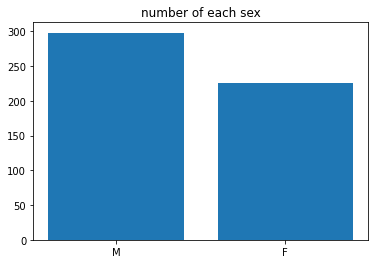

In [66]:
sex=['M','F']
sexnum=[(metadata.sex == 'M').sum(),(metadata.sex == 'F').sum()]
plt.bar(sex,sexnum)
plt.title('number of each sex')

In [72]:
age=[metadata.age.unique()]
agennum=[]
for a in age:
    count=0
    for a2 in metadata['age']:
        if a2== a:
            count+=1
    agenum[age.index(a)].append(count)
    
plt.bar(age,agenum)
plt.title('number of samples per age')
        
    

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()